In [410]:
import pandas as pd
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

import easygui as ey

from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

In [411]:
df_curr = pd.read_csv("D:/St Clair/SEM 3/DAB322 CAPSTONE PROJECT 1/Data/Apartment Building Evaluations 2023 - current_v2.csv")
df_curr.head()

_id      RSN  YEAR REGISTERED  YEAR BUILT  YEAR EVALUATED PROPERTY TYPE  \
0    1  4155322              NaN      1952.0            2023       PRIVATE   
1    2  4155311           2017.0      1955.0            2023       PRIVATE   
2    3  4156448           2017.0      1954.0            2024       PRIVATE   
3    4  4155312           2017.0      1970.0            2024       PRIVATE   
4    5  4156357           2017.0      1954.0            2024       PRIVATE   

  WARD          WARDNAME      SITE ADDRESS  CONFIRMED STOREYS  ...  \
0   02  Etobicoke Centre  308 THE KINGSWAY                  4  ...   
1   02  Etobicoke Centre  309 THE KINGSWAY                  4  ...   
2   02  Etobicoke Centre  310 THE KINGSWAY                  4  ...   
3   02  Etobicoke Centre  313 THE KINGSWAY                  4  ...   
4   02  Etobicoke Centre  314 THE KINGSWAY                  3  ...   

   CLEANING LOG VITAL SERVICE PLAN  ELECTRICAL SAFETY PLAN  \
0             3                  3                       2   
1             3                  3                       1   
2             3                  3                       3   
3             3                  3                       3   
4             3                  3                       3   

   STATE OF GOOD REPAIR PLAN  TENANT SERVICE REQUEST LOG   GRID   LATITUDE  \
0                          2                           3  W0229  43.664168   
1                          3                           3  W0229  43.664894   
2                          3                           3  W0229  43.664397   
3                          3                           3  W0229  43.664984   
4                          3                           3  W0229  43.664582   

   LONGITUDE           X            Y  
0 -79.523126  302919.200  4835802.229  
1 -79.522593  302962.211  4835882.832  
2 -79.523220  302902.147  4835840.037  
3 -79.522885  302938.716  4835892.909  
4 -79.523538  302881.557  4835854.438  

[5 rows x 71 columns]

In [412]:
df_curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _id                             3562 non-null   int64  
 1   RSN                             3562 non-null   int64  
 2   YEAR REGISTERED                 3505 non-null   float64
 3   YEAR BUILT                      3545 non-null   float64
 4   YEAR EVALUATED                  3562 non-null   int64  
 5   PROPERTY TYPE                   3562 non-null   object 
 6   WARD                            3562 non-null   object 
 7   WARDNAME                        3561 non-null   object 
 8   SITE ADDRESS                    3562 non-null   object 
 9   CONFIRMED STOREYS               3562 non-null   int64  
 10  CONFIRMED UNITS                 3562 non-null   int64  
 11  EVALUATION COMPLETED ON         3562 non-null   object 
 12  CURRENT BUILDING EVAL SCORE     35

In [413]:
round(df_curr.isnull().sum()[df_curr.isnull().sum() > 0] / df_curr.shape[0] * 100, 2)

YEAR REGISTERED                    1.60
YEAR BUILT                         0.48
WARDNAME                           0.03
EXTERIOR GROUNDS                   1.07
FENCING                           25.74
RETAINING WALLS                   53.82
CATCH BASINS / STORM DRAINAGE     21.62
BUILDING EXTERIOR                  0.25
BALCONY GUARDS                    32.85
WINDOWS                            0.08
EXT. RECEPTACLE STORAGE AREA       9.18
EXTERIOR WALKWAYS                  0.93
CLOTHING DROP BOXES               91.69
ACCESSORY BUILDINGS               85.85
INTERCOM                           1.60
LOBBY - WALLS AND CEILING          0.73
LOBBY FLOORS                       0.70
LAUNDRY ROOM                       4.83
INT. RECEPTACLE STORAGE AREA      77.46
MAIL RECEPTACLES                   7.10
EXTERIOR DOORS                     0.06
STORAGE AREAS/LOCKERS MAINT.      48.46
POOLS                             93.35
OTHER AMENITIES                   78.21
PARKING AREAS                     10.86


### Univariate Analysis

In [414]:
def univariate_plot(data, col):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])
    fig.suptitle(f"Univariate Analysis : {col}")
    
    sns.histplot(data = data, x = col, ax = ax1)
    ax1.set_title("HistPlot")

    sns.boxplot(data = data, x = col, ax = ax2)
    ax2.set_title("BoxPlot")

    plt.tight_layout()
    plt.show()

**YEAR REGISTERED**

In [415]:
df_curr["YEAR REGISTERED"].describe().reset_index().T

0            1         2       3       4       5  \
index             count         mean       std     min     25%     50%   
YEAR REGISTERED  3505.0  2017.447646  1.407806  2017.0  2017.0  2017.0   

                      6       7  
index               75%     max  
YEAR REGISTERED  2017.0  2024.0

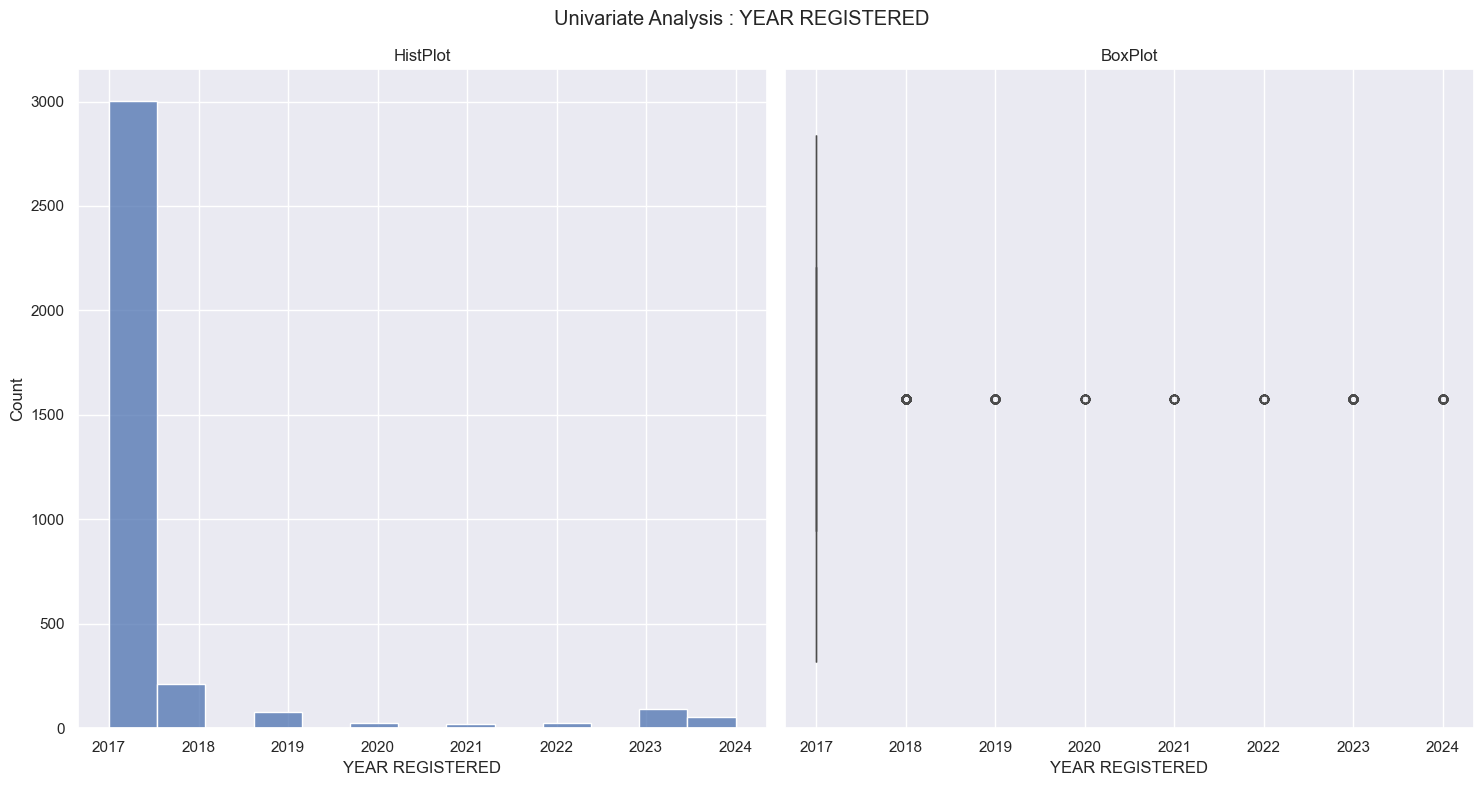

In [416]:
univariate_plot(df_curr, "YEAR REGISTERED")

**YEAR BUILT**

In [417]:
df_curr["YEAR BUILT"].describe().reset_index().T

0            1          2       3       4       5       6  \
index        count         mean        std     min     25%     50%     75%   
YEAR BUILT  3545.0  1962.211848  20.196257  1805.0  1955.0  1962.0  1970.0   

                 7  
index          max  
YEAR BUILT  2023.0

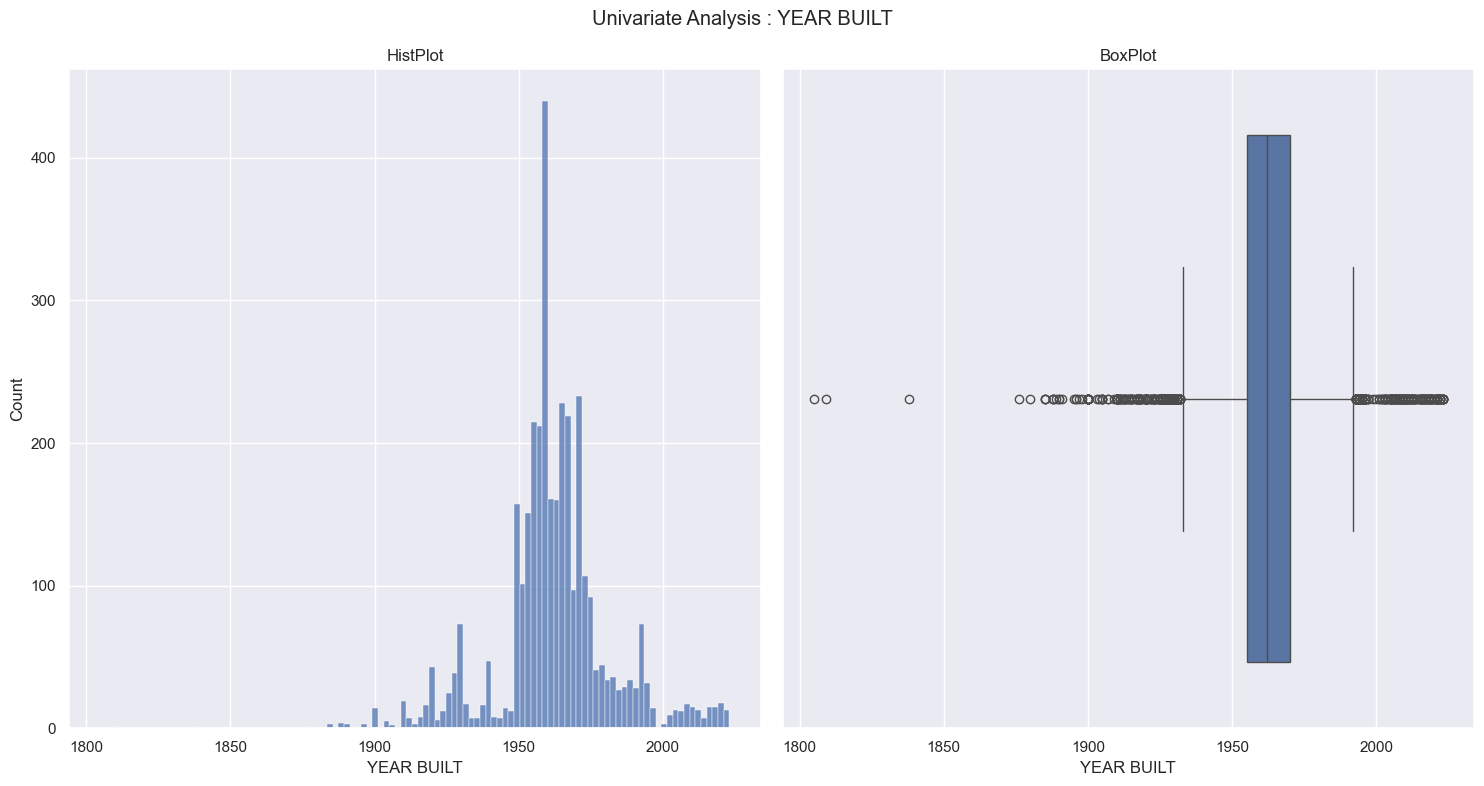

In [418]:
univariate_plot(df_curr, "YEAR BUILT")

**YEAR EVALUATED**

In [419]:
df_curr["YEAR EVALUATED"].describe().reset_index().T

0            1         2       3       4       5       6  \
index            count         mean       std     min     25%     50%     75%   
YEAR EVALUATED  3562.0  2023.506457  0.500028  2023.0  2023.0  2024.0  2024.0   

                     7  
index              max  
YEAR EVALUATED  2024.0

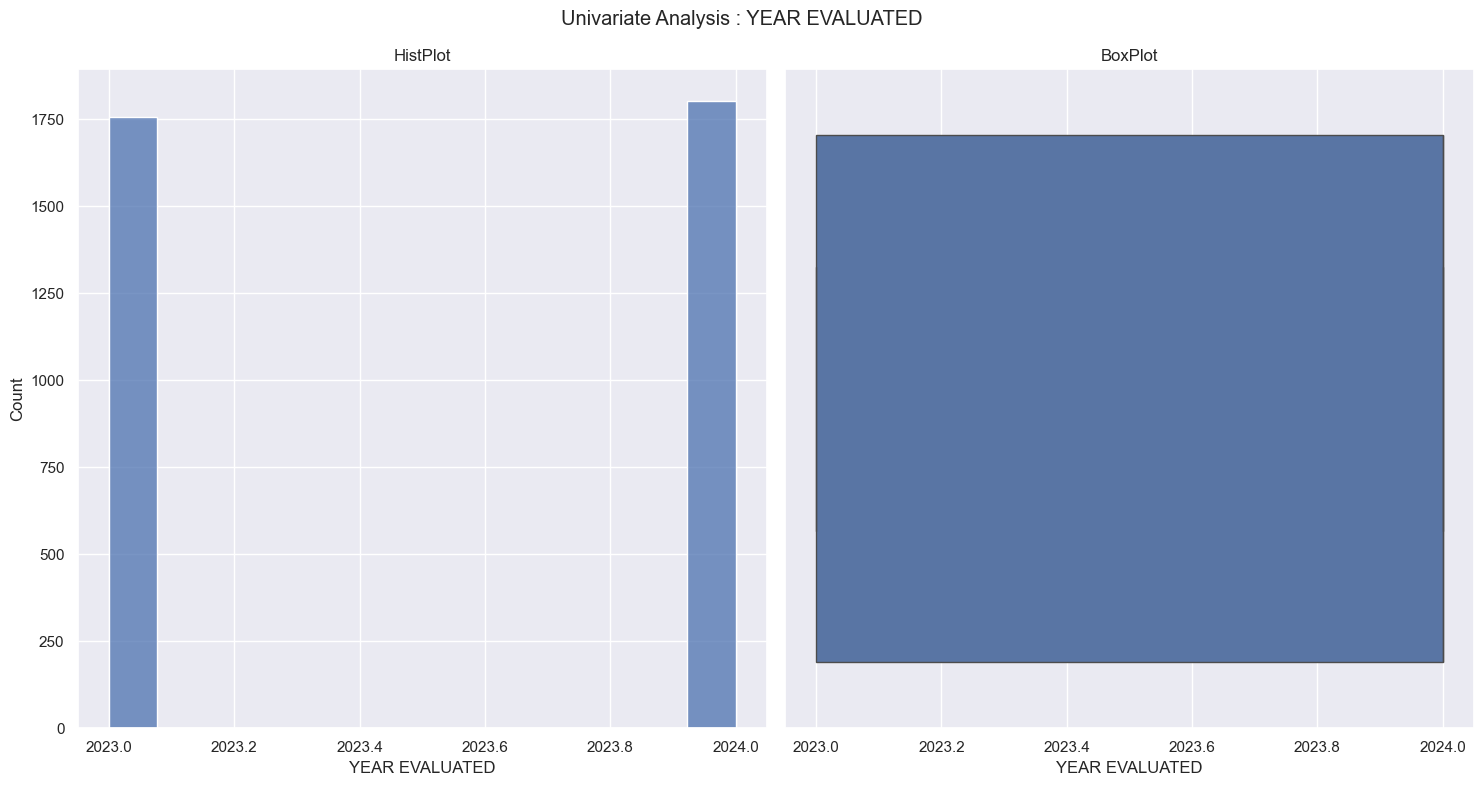

In [420]:
univariate_plot(df_curr, "YEAR EVALUATED")

**CONFIRMED STOREYS**

In [421]:
df_curr["CONFIRMED STOREYS"].describe().reset_index().T

0         1         2    3    4    5     6     7
index               count      mean       std  min  25%  50%   75%   max
CONFIRMED STOREYS  3562.0  7.779899  6.498168  3.0  3.0  4.0  10.0  51.0

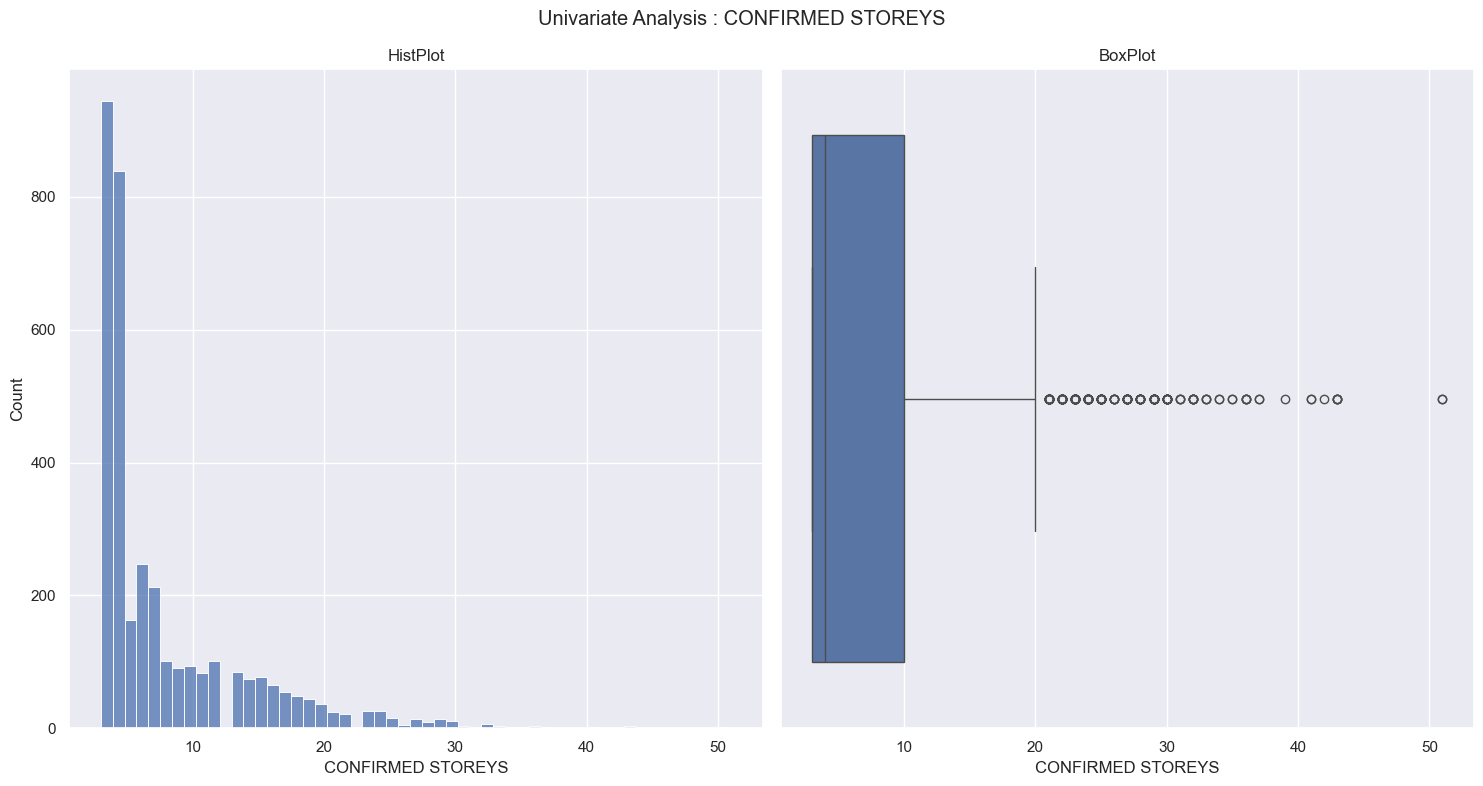

In [422]:
univariate_plot(df_curr, "CONFIRMED STOREYS")

**CONFIRMED UNITS**

In [423]:
df_curr["CONFIRMED UNITS"].describe().reset_index().T

0          1          2     3     4     5      6      7
index             count       mean        std   min   25%   50%    75%    max
CONFIRMED UNITS  3562.0  89.966873  97.420626  10.0  23.0  50.0  125.0  793.0

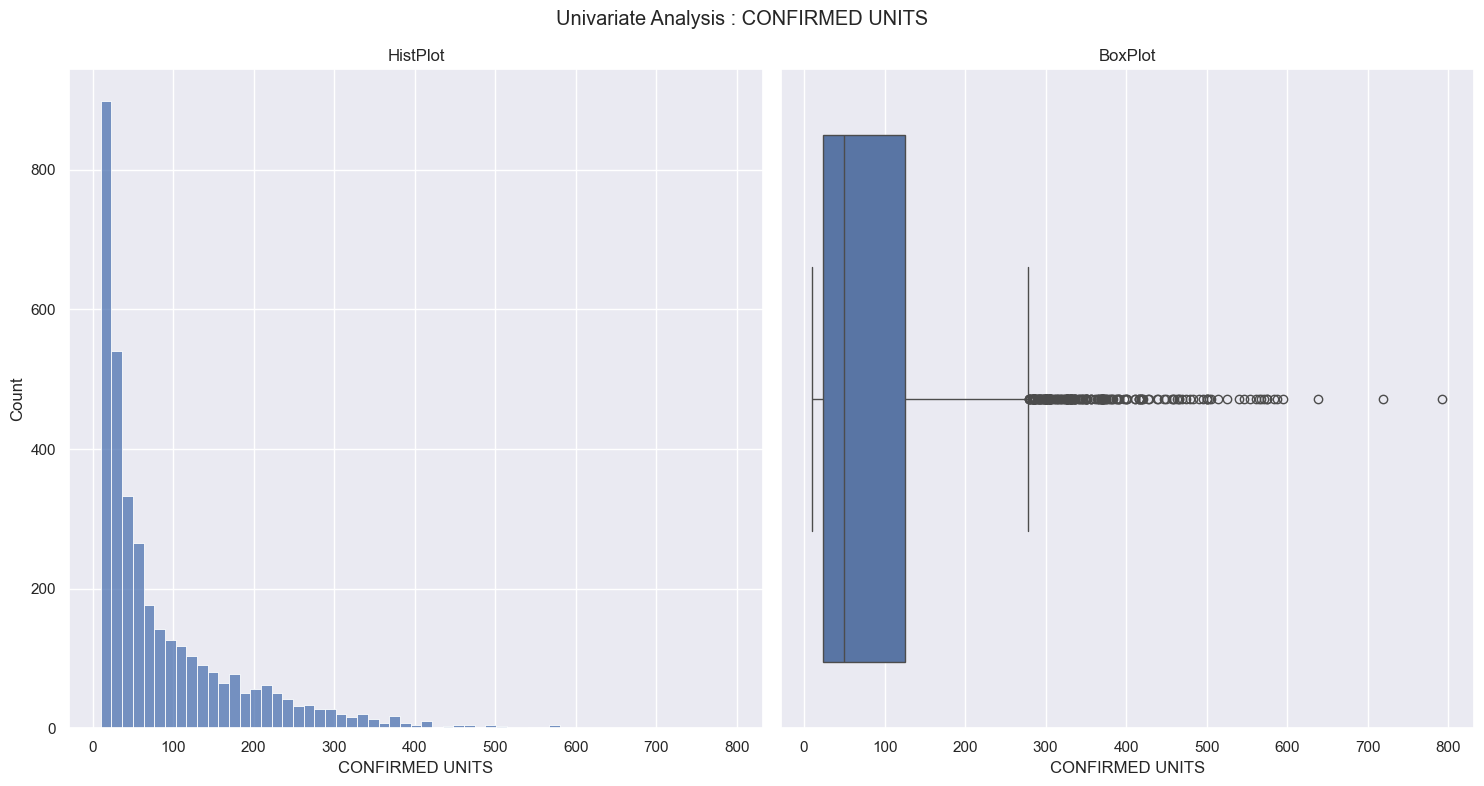

In [424]:
univariate_plot(df_curr, "CONFIRMED UNITS")

**CURRENT BUILDING EVAL SCORE**

In [425]:
df_curr["CURRENT BUILDING EVAL SCORE"].describe().reset_index().T

0          1         2     3     4     5  \
index                         count       mean       std   min   25%   50%   
CURRENT BUILDING EVAL SCORE  3562.0  87.141241  8.768558  17.0  83.0  89.0   

                                6      7  
index                         75%    max  
CURRENT BUILDING EVAL SCORE  93.0  100.0

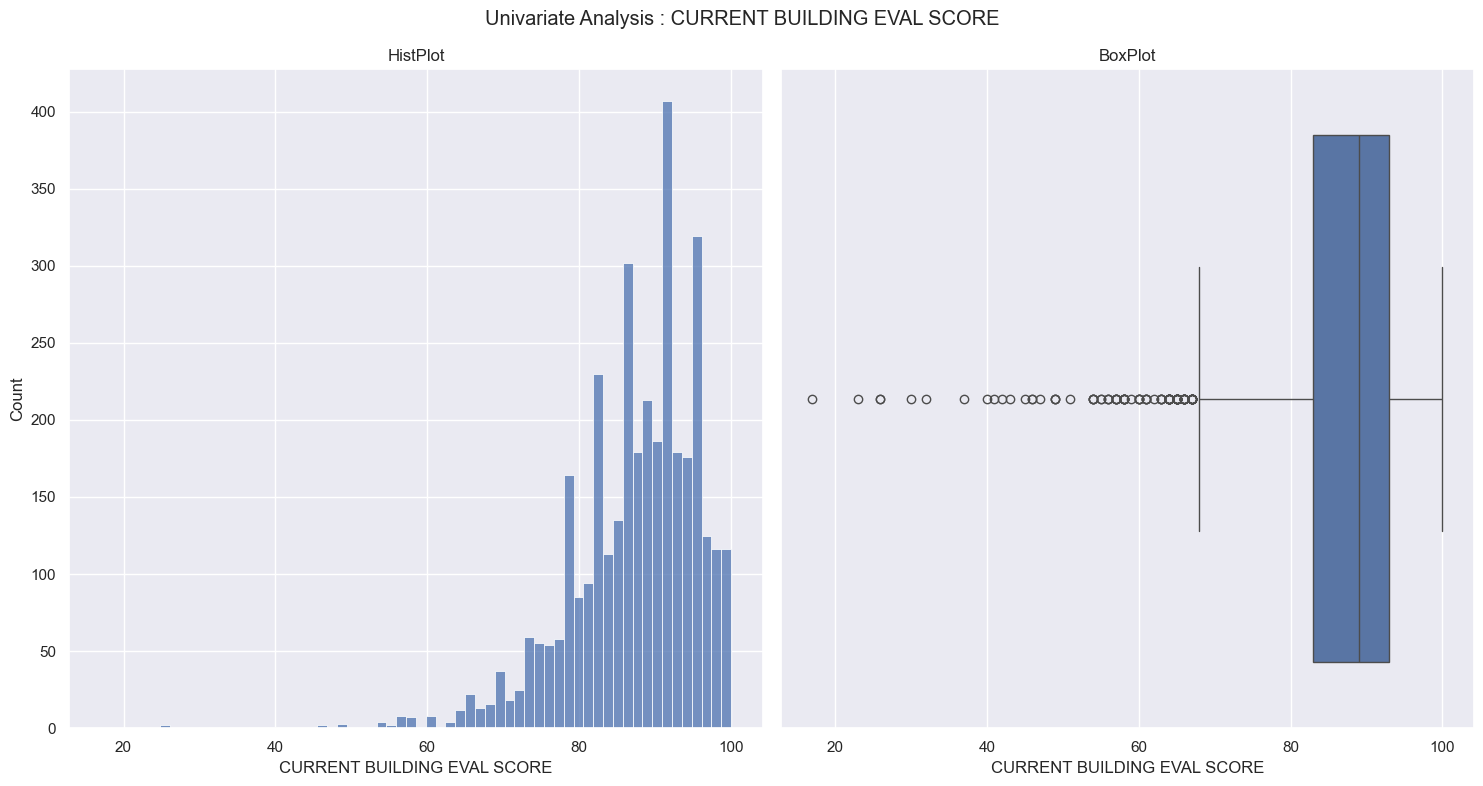

In [426]:
univariate_plot(df_curr, "CURRENT BUILDING EVAL SCORE")

**PROACTIVE BUILDING SCORE**

In [427]:
df_curr["PROACTIVE BUILDING SCORE"].describe().reset_index().T

0         1         2     3     4     5     6  \
index                      count      mean       std   min   25%   50%   75%   
PROACTIVE BUILDING SCORE  3562.0  87.31137  8.668057  17.0  83.0  89.0  93.0   

                              7  
index                       max  
PROACTIVE BUILDING SCORE  100.0

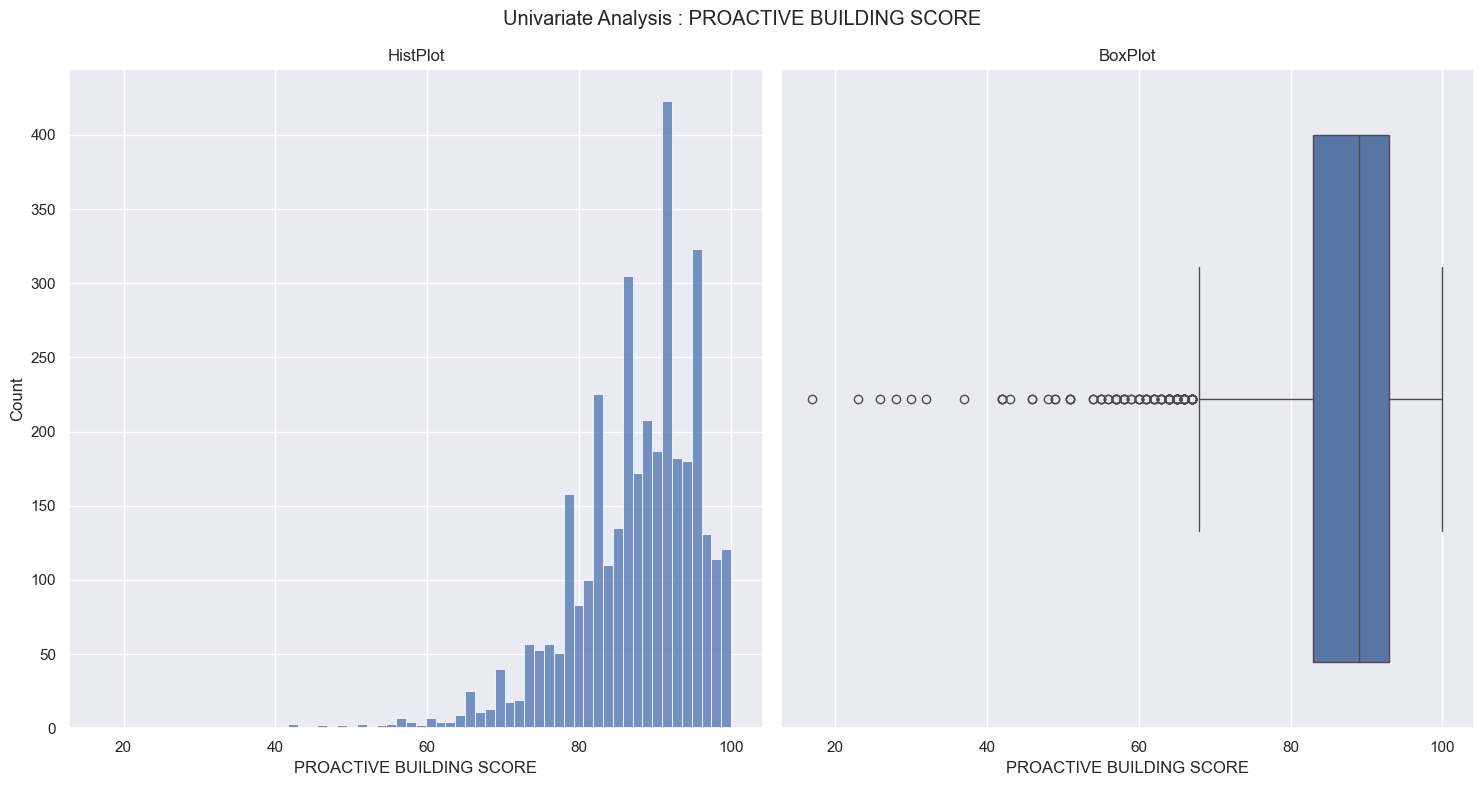

In [428]:
univariate_plot(df_curr, "PROACTIVE BUILDING SCORE")

**CURRENT REACTIVE SCORE**

In [429]:
df_curr["CURRENT REACTIVE SCORE"].describe().reset_index().T

0         1         2     3    4    5    6    7
index                    count      mean       std   min  25%  50%  75%  max
CURRENT REACTIVE SCORE  3562.0 -0.170129  0.530163 -11.0  0.0  0.0  0.0  0.0

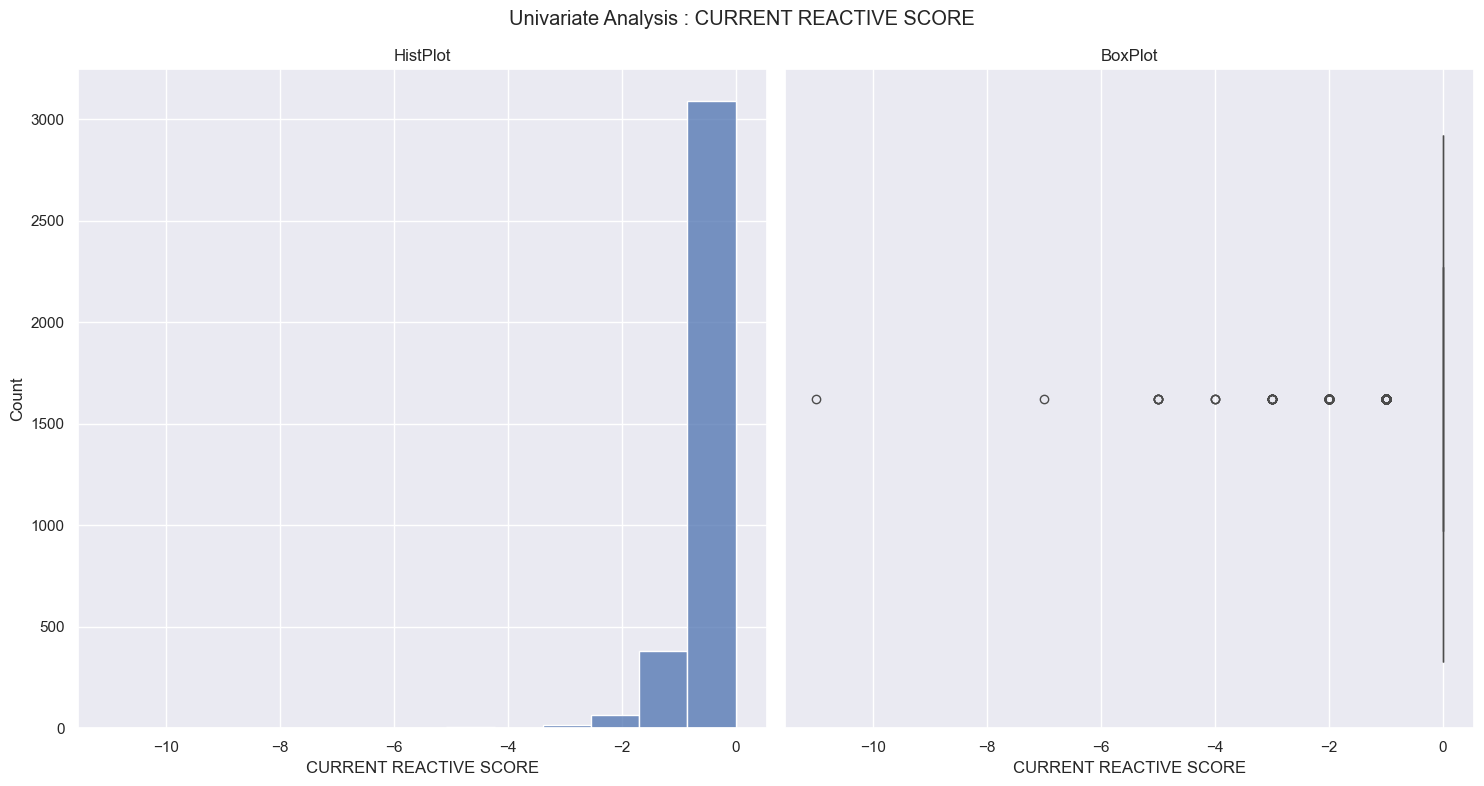

In [430]:
univariate_plot(df_curr, "CURRENT REACTIVE SCORE")

**NO OF AREAS EVALUATED**

In [431]:
df_curr["NO OF AREAS EVALUATED"].describe().reset_index().T

0         1         2     3     4     5     6  \
index                   count      mean       std   min   25%   50%   75%   
NO OF AREAS EVALUATED  3562.0  41.21589  3.676583  27.0  38.0  42.0  44.0   

                          7  
index                   max  
NO OF AREAS EVALUATED  49.0

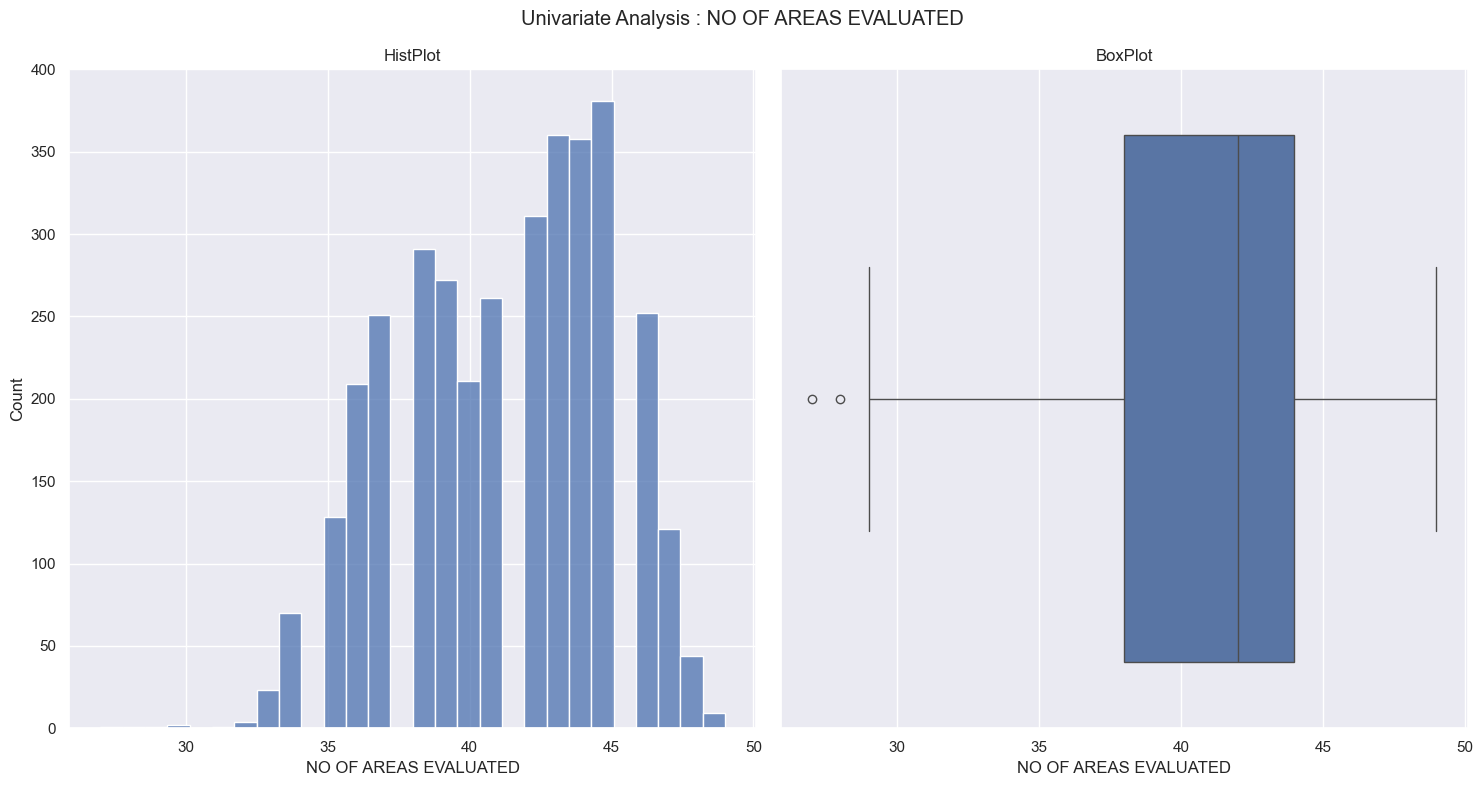

In [432]:
univariate_plot(df_curr, "NO OF AREAS EVALUATED")

### Bivariate Analysis

**YEAR BUILT vs CURRENT BUILDING EVAL SCORE**

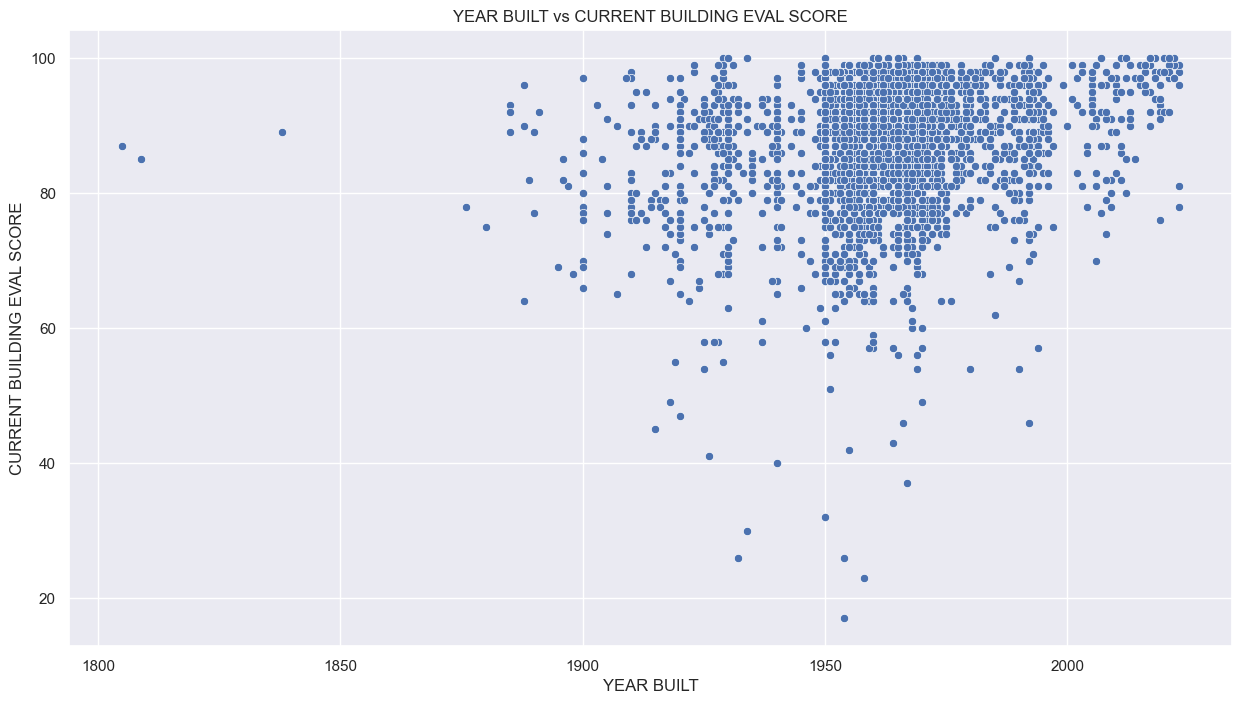

In [433]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_curr, x = "YEAR BUILT", y = "CURRENT BUILDING EVAL SCORE")
plt.title("YEAR BUILT vs CURRENT BUILDING EVAL SCORE")
plt.show()

**CONFIRMED UNITS vs PROACTIVE BUILDING SCORE**

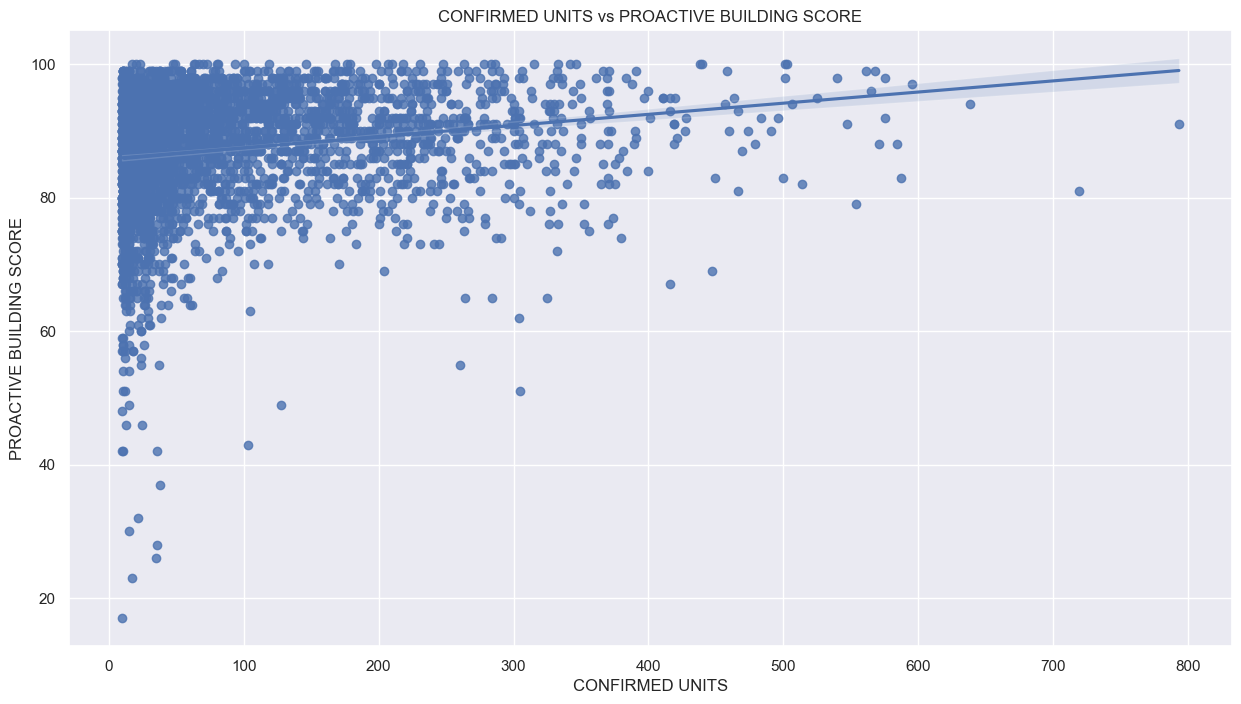

In [434]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_curr, x = "CONFIRMED UNITS", y = "PROACTIVE BUILDING SCORE")
plt.title("CONFIRMED UNITS vs PROACTIVE BUILDING SCORE")
plt.show()

**WARD vs CURRENT BUILDING EVAL SCORE**

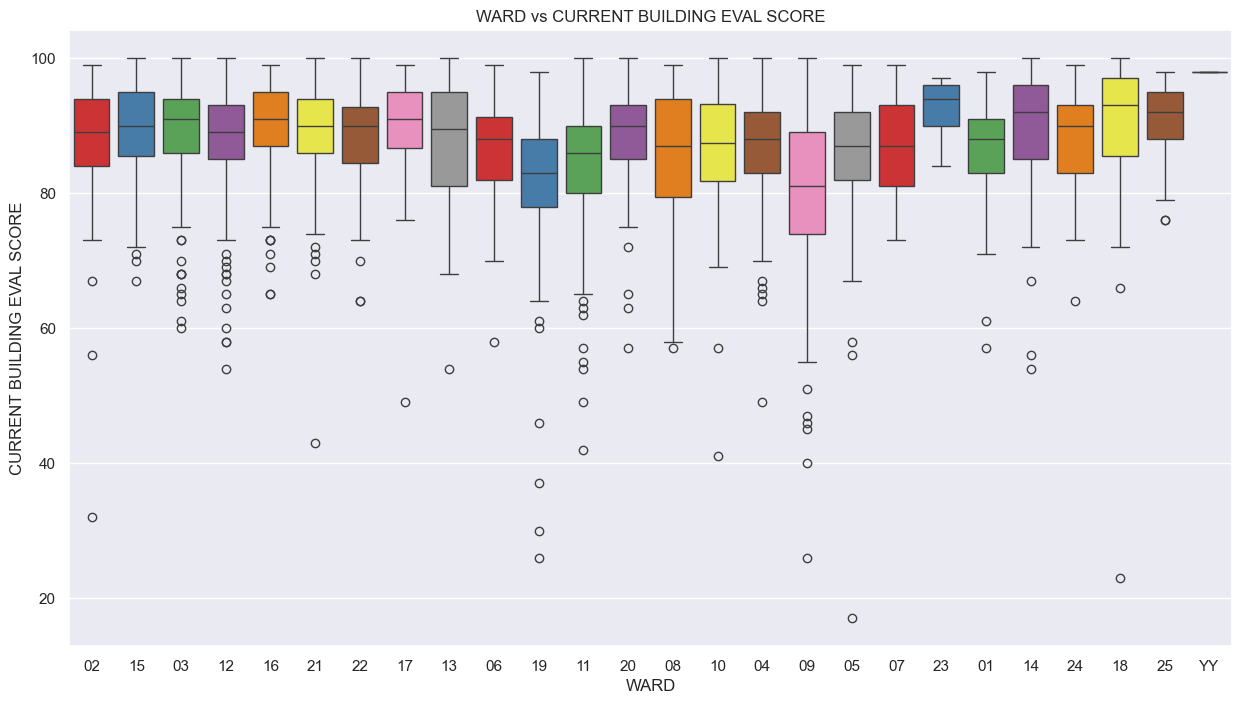

In [435]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_curr, x = "WARD", y = "CURRENT BUILDING EVAL SCORE", palette = "Set1")
plt.title("WARD vs CURRENT BUILDING EVAL SCORE")
plt.show()

**PROPERTY TYPE vs CURRENT REACTIVE SCORE**

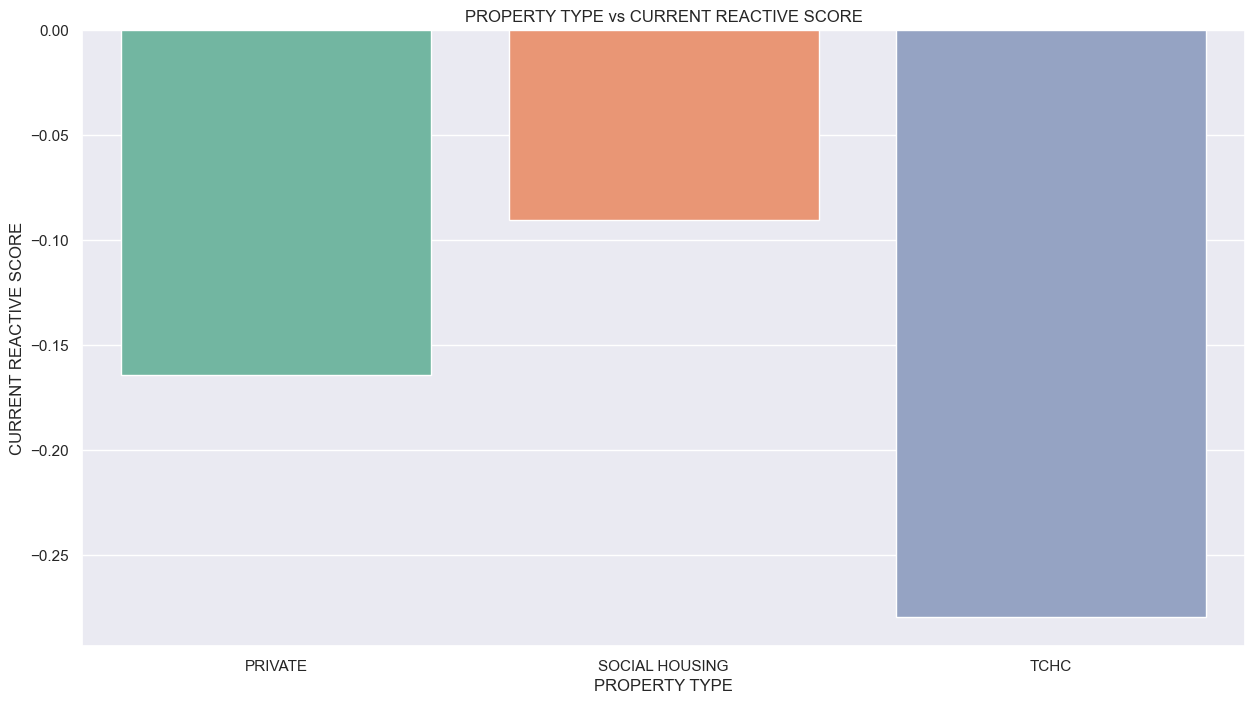

In [436]:
plt.figure(figsize = [15,8])
sns.barplot(data = df_curr, x = "PROPERTY TYPE", y = "CURRENT REACTIVE SCORE", palette = "Set2", errorbar=('ci', 0))
plt.title("PROPERTY TYPE vs CURRENT REACTIVE SCORE")
plt.show()

**YEAR EVALUATED vs CURRENT BUILDING EVAL SCORE**

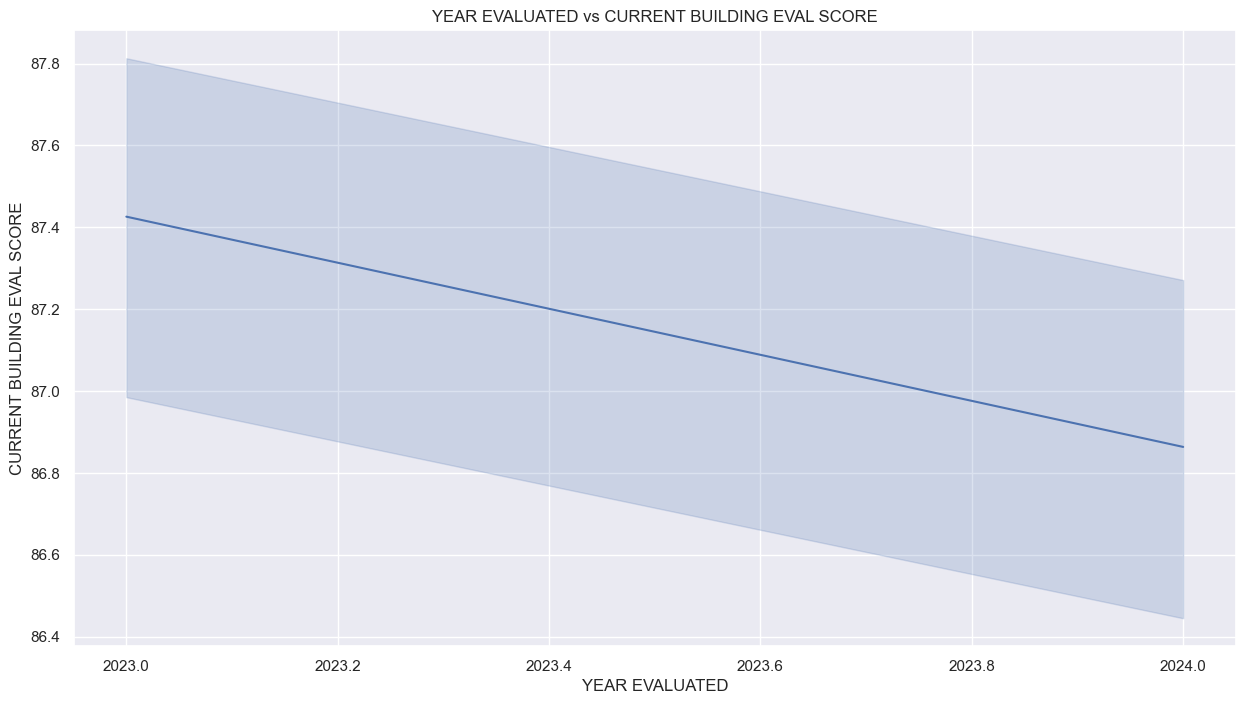

In [437]:
plt.figure(figsize = [15,8])
sns.lineplot(data = df_curr, x = "YEAR EVALUATED", y = "CURRENT BUILDING EVAL SCORE")
plt.title("YEAR EVALUATED vs CURRENT BUILDING EVAL SCORE")
plt.show()

### Multivariate Analysis

**YEAR BUILT, CONFIRMED UNITS, and CURRENT BUILDING EVAL SCORE**

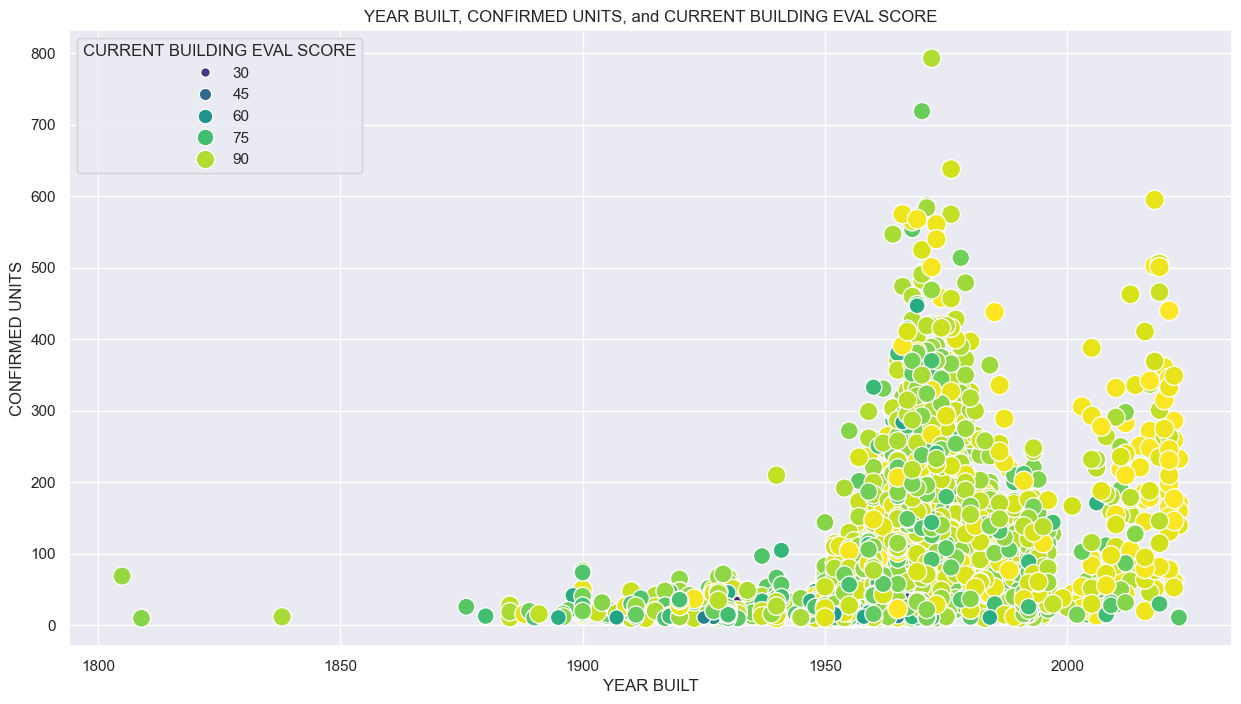

In [438]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_curr, x = 'YEAR BUILT', y = 'CONFIRMED UNITS', 
                hue='CURRENT BUILDING EVAL SCORE', palette = 'viridis', 
                size = 'CURRENT BUILDING EVAL SCORE', sizes = (20, 200))
plt.title("YEAR BUILT, CONFIRMED UNITS, and CURRENT BUILDING EVAL SCORE")
plt.show()

**PROPERTY TYPE, WARD, and PROACTIVE BUILDING SCORE**

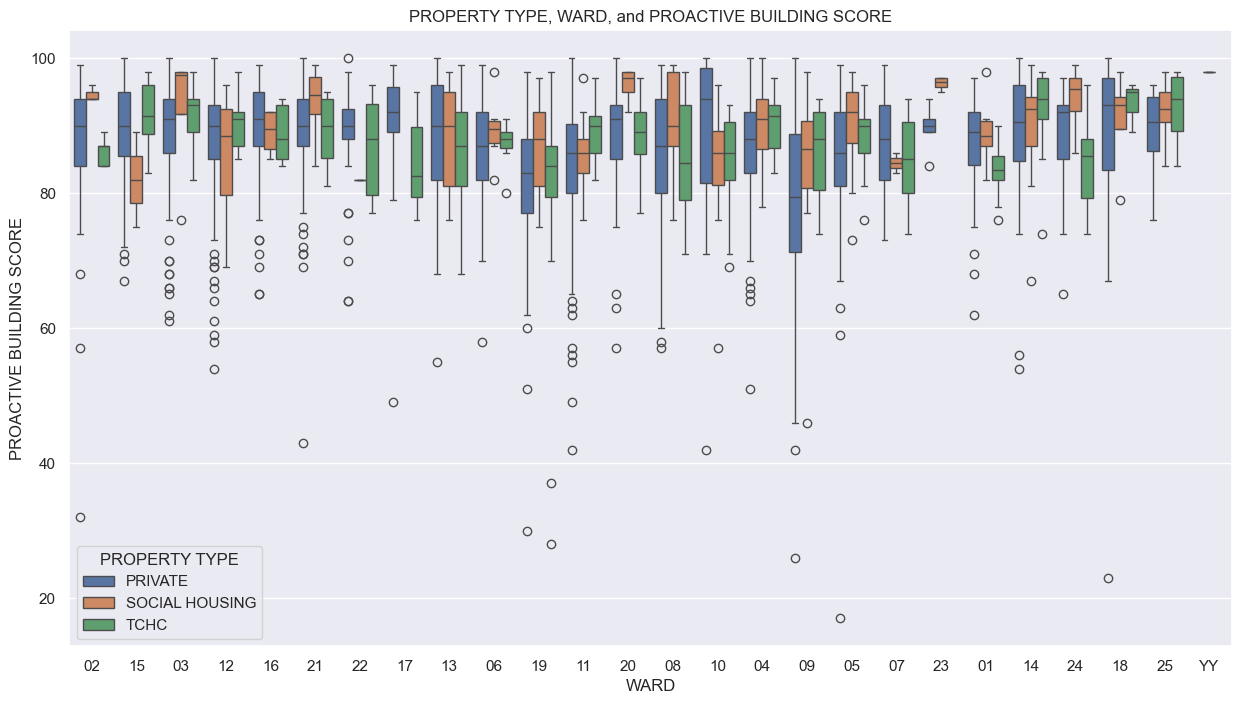

In [439]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_curr, x = 'WARD', y = 'PROACTIVE BUILDING SCORE', hue = 'PROPERTY TYPE')
plt.title('PROPERTY TYPE, WARD, and PROACTIVE BUILDING SCORE')
plt.show()

**LATITUDE, LONGITUDE, and CURRENT BUILDING EVAL SCORE**

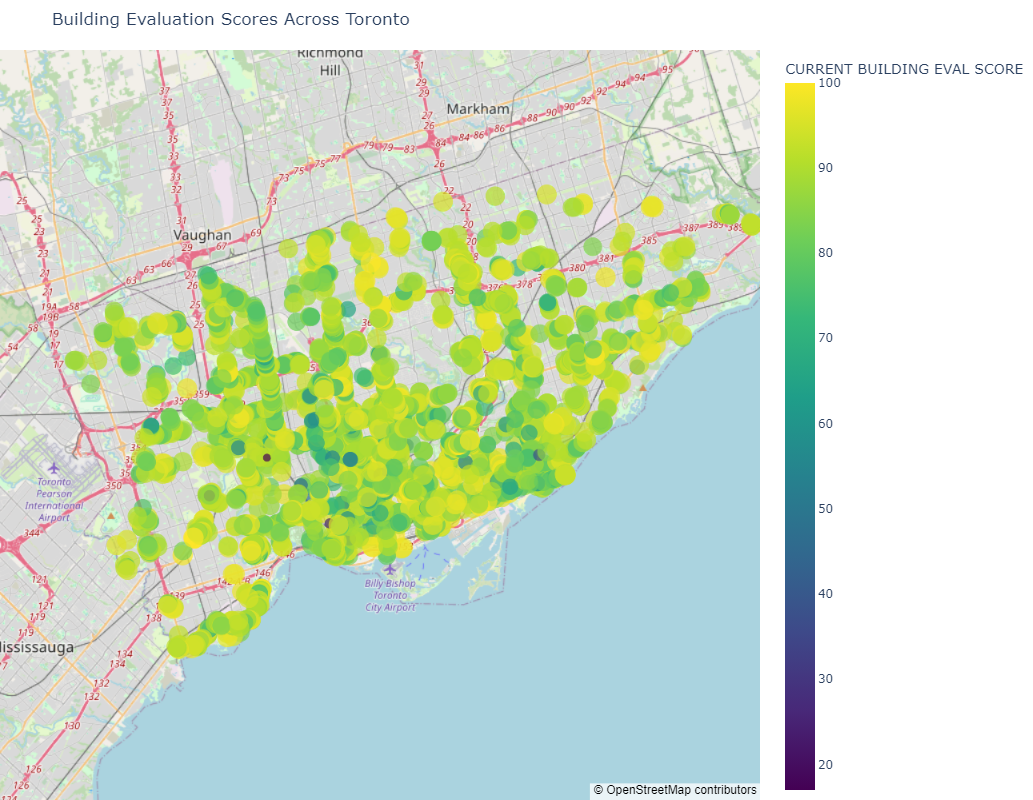

In [440]:
fig = px.scatter_mapbox(df_curr, 
                        lat = "LATITUDE", 
                        lon = "LONGITUDE", 
                        color = "CURRENT BUILDING EVAL SCORE",
                        size = "CURRENT BUILDING EVAL SCORE",
                        hover_name = "SITE ADDRESS",
                        hover_data = ["YEAR BUILT", "CONFIRMED UNITS"],
                        color_continuous_scale = px.colors.sequential.Viridis,
                        size_max = 15,
                        zoom = 10,
                        title = "Building Evaluation Scores Across Toronto")

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":50,"l":0,"b":0}, width = 1500, height = 800)

fig.show()

**ANALYSING DATA FROM 2017 TO 2023**

In [441]:
df_old = pd.read_csv("D:/St Clair/SEM 3/DAB322 CAPSTONE PROJECT 1/Data/Pre-2023 Apartment Building Evaluations.csv")
df_old.head()

_id      RSN  YEAR_REGISTERED  YEAR_EVALUATED  YEAR_BUILT PROPERTY_TYPE  \
0    1  4304347              NaN             NaN      1999.0       PRIVATE   
1    2  5156815           2023.0             NaN      1973.0          TCHC   
2    3  5156814           2023.0             NaN      1973.0          TCHC   
3    4  5157421           2023.0             NaN      1973.0          TCHC   
4    5  5156871           2023.0             NaN      1973.0          TCHC   

   WARD          WARDNAME                              SITE_ADDRESS  \
0     2  Etobicoke Centre  ** CREATED IN ERROR ** 399 THE WEST MALL   
1    17  Don Valley North                        15 FIELD SPARROWAY   
2    17  Don Valley North                        13 FIELD SPARROWAY   
3    17  Don Valley North                          6 TREE SPARROWAY   
4    17  Don Valley North                          2 TREE SPARROWAY   

   CONFIRMED_STOREYS  ...  EXTERIOR_WALKWAYS BALCONY_GUARDS  \
0                 22  ...                5.0            5.0   
1                  4  ...                5.0            5.0   
2                  4  ...                4.0            5.0   
3                  4  ...                3.0            5.0   
4                  4  ...                5.0            5.0   

   WATER_PEN_EXT_BLDG_ELEMENTS PARKING_AREA  OTHER_FACILITIES   GRID  \
0                          5.0          5.0               5.0  W0233   
1                          4.0          3.0               4.0  N1721   
2                          4.0          3.0               4.0  N1721   
3                          4.0          3.0               4.0  N1721   
4                          4.0          3.0               4.0  N1721   

    LATITUDE  LONGITUDE           X            Y  
0  43.643781 -79.565456  299503.625  4833538.964  
1  43.791143 -79.368820  315333.193  4849916.905  
2  43.790920 -79.368771  315334.815  4849906.373  
3  43.791384 -79.369630  315272.148  4849932.515  
4  43.791511 -79.369045  315330.308  4849947.465  

[5 rows x 40 columns]

In [442]:
df_old.shape

(11760, 40)

In [443]:
df_old.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

In [444]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          11760 non-null  int64  
 1   RSN                          11760 non-null  int64  
 2   YEAR_REGISTERED              11455 non-null  float64
 3   YEAR_EVALUATED               9751 non-null   float64
 4   YEAR_BUILT                   11714 non-null  float64
 5   PROPERTY_TYPE                11760 non-null  object 
 6   WARD                         11760 non-null  int64  
 7   WARDNAME                     11760 non-null  object 
 8   SITE_ADDRESS                 11760 non-null  object 
 9   CONFIRMED_STOREYS            11760 non-null  int64  
 10  CONFIRMED_UNITS              11760 non-null  int64  
 11  EVALUATION_COMPLETED_ON      11760 non-null  object 
 12  SCORE                        11760 non-null  int64  
 13  RESULTS_OF_SCORE

In [445]:
df_old.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  11760.000000  1.176000e+04     11455.000000     9751.000000   
mean    5880.500000  4.171812e+06      2017.164033     2018.564968   
std     3394.963917  8.183299e+04         0.605889        1.467689   
min        1.000000  4.152554e+06      2017.000000     2017.000000   
25%     2940.750000  4.153701e+06      2017.000000     2017.000000   
50%     5880.500000  4.154620e+06      2017.000000     2018.000000   
75%     8820.250000  4.155548e+06      2017.000000     2020.000000   
max    11760.000000  5.207679e+06      2023.000000     2021.000000   

         YEAR_BUILT          WARD  CONFIRMED_STOREYS  CONFIRMED_UNITS  \
count  11714.000000  11760.000000       11760.000000     11760.000000   
mean    1961.077258     10.855357           7.629592        87.920408   
std       18.923485      6.332947           6.245635        95.349729   
min     1805.000000      1.000000           3.000000        10.000000   
25%     1955.000000      5.000000           3.000000        24.000000   
50%     1961.000000     11.000000           4.000000        48.000000   
75%     1970.000000     16.000000          10.000000       120.000000   
max     2022.000000     25.000000          51.000000       793.000000   

              SCORE  NO_OF_AREAS_EVALUATED  ...  EXTERIOR_GROUNDS  \
count  11760.000000           11760.000000  ...      11745.000000   
mean      73.826956              17.141327  ...          3.650575   
std       10.566185               1.691816  ...          0.754074   
min        0.000000               0.000000  ...          1.000000   
25%       66.000000              16.000000  ...          3.000000   
50%       74.000000              17.000000  ...          4.000000   
75%       81.000000              19.000000  ...          4.000000   
max      100.000000              20.000000  ...          5.000000   

       EXTERIOR_WALKWAYS  BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
count       11754.000000     7973.000000                 11754.000000   
mean            3.643866        3.752665                     3.668453   
std             0.744887        0.833194                     0.739714   
min             1.000000        1.000000                     1.000000   
25%             3.000000        3.000000                     3.000000   
50%             4.000000        4.000000                     4.000000   
75%             4.000000        4.000000                     4.000000   
max             5.000000        5.000000                     5.000000   

       PARKING_AREA  OTHER_FACILITIES      LATITUDE     LONGITUDE  \
count  10704.000000       2254.000000  11529.000000  11529.000000   
mean       3.392096          4.019521     43.699570    -79.408752   
std        0.757125          0.795332      0.043897      0.088020   
min        1.000000          1.000000     43.588276    -79.614871   
25%        3.000000          4.000000     43.668211    -79.480110   
50%        3.000000          4.000000     43.698930    -79.419515   
75%        4.000000          5.000000     43.731024    -79.346769   
max        5.000000          5.000000     43.813943    -79.149243   

                   X             Y  
count   11667.000000  1.166700e+04  
mean   312133.360552  4.839722e+06  
std      7086.682471  4.863705e+03  
min    295530.634000  4.827372e+06  
25%    306397.990500  4.836247e+06  
50%    311309.741000  4.839640e+06  
75%    317059.926000  4.843209e+06  
max    332968.256000  4.852475e+06  

[8 rows x 34 columns]

In [446]:
df_curr.columns = df_curr.columns.str.replace(" ", "_")

**CURRENT_BUILDING_EVAL_SCORE**

In [447]:
df_curr.rename(columns = {"CURRENT_BUILDING_EVAL_SCORE": "SCORE"}, inplace = True)

**RESULTS_OF_SCORE**

In [448]:
df_old['RESULTS_OF_SCORE'].unique()

array(['Evaluation needs to be conducted in 3 years',
       'Evaluation needs to be conducted in 2 years',
       'Evaluation needs to be conducted in 1 year', 'Building Audit'],
      dtype=object)

In [449]:
print(f"Evaluation needs to be conducted in 1 year min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 1 year'].min()}")
print(f"Evaluation needs to be conducted in 1 year max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 1 year'].max()}")
print(f"Evaluation needs to be conducted in 2 years min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 2 years'].min()}")
print(f"Evaluation needs to be conducted in 2 years max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 2 years'].max()}")
print(f"Evaluation needs to be conducted in 3 years min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 3 years'].min()}")
print(f"Evaluation needs to be conducted in 3 years max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 3 years'].max()}")
print(f"Building Audit min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Building Audit'].min()}")
print(f"Building Audit max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Building Audit'].max()}")

Evaluation needs to be conducted in 1 year min 51
Evaluation needs to be conducted in 1 year max 65
Evaluation needs to be conducted in 2 years min 66
Evaluation needs to be conducted in 2 years max 85
Evaluation needs to be conducted in 3 years min 86
Evaluation needs to be conducted in 3 years max 100
Building Audit min 0
Building Audit max 50


In [450]:
df_curr['RESULTS_OF_SCORE'] = df_curr['SCORE'].apply(
    lambda x: 'Building Audit' if x < 50 else
              'Evaluation needs to be conducted in 1 year' if x < 66 else
              'Evaluation needs to be conducted in 2 years' if x < 85 else
              'Evaluation needs to be conducted in 3 years'
)

In [451]:
df_curr['SCORE'][df_curr['RESULTS_OF_SCORE'] == 'Evaluation needs to be conducted in 3 years'].count()

2453

**ENTRANCE_LOBBY :- LOBBY_-_WALLS_AND_CEILING + LOBBY_FLOORS**

In [452]:
df_old['ENTRANCE_LOBBY'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [453]:
df_curr['LOBBY_-_WALLS_AND_CEILING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [454]:
df_curr['LOBBY_FLOORS'].unique()

array(['2', '3', '1', nan, '0', ' 1', ' N/A'], dtype=object)

In [455]:
df_curr['LOBBY_FLOORS'] = pd.to_numeric(
    df_curr['LOBBY_FLOORS'].str.strip(), errors = 'coerce'
)

df_curr['ENTRANCE_LOBBY'] = df_curr['LOBBY_-_WALLS_AND_CEILING'] + df_curr['LOBBY_FLOORS']

bins = [round(df_curr['ENTRANCE_LOBBY'].max()/5 * i, 2) for i in range(0,6)]
df_curr["ENTRANCE_LOBBY"] = np.where(df_curr["ENTRANCE_LOBBY"].isnull(), -1, pd.cut(df_curr["ENTRANCE_LOBBY"], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['ENTRANCE_LOBBY'].value_counts()

 5.0    2808
 4.0     571
 3.0      95
 2.0      54
-1.0      28
 1.0       6
Name: ENTRANCE_LOBBY, dtype: int64

**ELEVATORS :- ELEVATOR_COSMETICS + ELEVATOR_MAINTENANCE**

In [456]:
df_curr['ELEVATOR_COSMETICS'].unique()

array([nan, '2', '3', '1', '0', ' N/A'], dtype=object)

In [457]:
df_curr['ELEVATOR_MAINTENANCE'].unique()

array([nan, '3', '2', '1', '0', ' 3', ' N/A'], dtype=object)

In [458]:
df_old['ELEVATORS'].unique()

array([ 5., nan,  4.,  3.,  2.,  1.])

In [459]:
df_curr['ELEVATOR_COSMETICS'] = pd.to_numeric(
    df_curr['ELEVATOR_COSMETICS'].str.strip(), errors='coerce'
)

df_curr['ELEVATOR_MAINTENANCE'] = pd.to_numeric(
    df_curr['ELEVATOR_MAINTENANCE'].str.strip(), errors='coerce'
)

df_curr['ELEVATORS'] = df_curr['ELEVATOR_COSMETICS'] + df_curr['ELEVATOR_MAINTENANCE']

bins = [round(df_curr['ELEVATORS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['ELEVATORS'] = np.where(df_curr['ELEVATORS'].isnull(), -1, pd.cut(df_curr['ELEVATORS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['ELEVATORS'].value_counts()

 5.0    2054
-1.0    1439
 4.0      51
 1.0       9
 3.0       5
 2.0       4
Name: ELEVATORS, dtype: int64

**ENTRANCE_DOORS_WINDOWS :- WINDOWS + EXTERIOR_DOORS**

In [460]:
df_old['ENTRANCE_DOORS_WINDOWS'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [461]:
df_curr['WINDOWS'].unique()

array([ 2.,  3.,  1., nan])

In [462]:
df_curr['EXTERIOR_DOORS'].unique()

array([ 3.,  1.,  2., nan,  0.])

In [463]:
df_curr['ENTRANCE_DOORS_WINDOWS'] = df_curr['EXTERIOR_DOORS'] + df_curr['WINDOWS']

bins = [round(df_curr['ENTRANCE_DOORS_WINDOWS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['ENTRANCE_DOORS_WINDOWS'] = np.where(df_curr['ENTRANCE_DOORS_WINDOWS'].isnull(), -1, pd.cut(df_curr['ENTRANCE_DOORS_WINDOWS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['ENTRANCE_DOORS_WINDOWS'].value_counts()

 5.0    2846
 4.0     561
 3.0     129
 2.0      21
-1.0       5
Name: ENTRANCE_DOORS_WINDOWS, dtype: int64

**LAUNDRY_ROOMS :- LAUNDRY_ROOM**

In [464]:
df_old["LAUNDRY_ROOMS"].unique()

array([ 5., nan,  2.,  4.,  3.,  1.])

In [465]:
df_curr["LAUNDRY_ROOM"].unique()

array(['3', '2', '1', nan, '0', ' 2', ' N/A'], dtype=object)

In [466]:
df_curr['LAUNDRY_ROOMS'] = pd.to_numeric(
    df_curr['LAUNDRY_ROOM'].str.strip(), errors='coerce'
)

bins = [round(df_curr['LAUNDRY_ROOMS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['LAUNDRY_ROOMS'] = np.where(df_curr['LAUNDRY_ROOMS'].isnull(), -1, pd.cut(df_curr['LAUNDRY_ROOMS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['LAUNDRY_ROOMS'].value_counts()

 5.0    1955
 4.0    1238
-1.0     173
 2.0     169
 1.0      27
Name: LAUNDRY_ROOMS, dtype: int64

**EXTERIOR_CLADDING :- BUILDING_EXTERIOR**

In [467]:
df_old['EXTERIOR_CLADDING'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [468]:
df_curr['BUILDING_EXTERIOR'].unique()

array([ 2.,  3.,  1., nan,  0.])

In [469]:
df_curr['EXTERIOR_CLADDING'] = pd.to_numeric(df_curr['BUILDING_EXTERIOR'], errors='coerce')

def scale_exterior(value):
    if value == 3:
        return 5  
    elif value == 2:
        return random.choice([3, 4])  
    elif value == 1:
        return random.choice([1, 2])
    elif value == 0:
        return 0 
    else:
        return np.nan 

df_curr['EXTERIOR_CLADDING'] = df_curr['EXTERIOR_CLADDING'].apply(scale_exterior)

df_curr['EXTERIOR_CLADDING'].value_counts()

5.0    1110
4.0    1019
3.0     929
1.0     252
2.0     242
0.0       1
Name: EXTERIOR_CLADDING, dtype: int64

**GARBAGE_BIN_STORAGE_AREA :- GARBAGE/COMPACTOR_ROOM + EXT._RECEPTACLE_STORAGE_AREA + INT._RECEPTACLE_STORAGE_AREA**

In [470]:
df_old['GARBAGE_BIN_STORAGE_AREA'].unique()

array([ 5.,  4., nan,  3.,  2.,  1.])

In [471]:
df_curr['GARBAGE/COMPACTOR_ROOM'].unique()

array([nan, '3', '2', '1', ' N/A', ' 3', '0', ' 1'], dtype=object)

In [472]:
df_curr['EXT._RECEPTACLE_STORAGE_AREA'].unique()

array(['3', '2', nan, '1', ' 2', ' 1', '0', ' N/A'], dtype=object)

In [473]:
df_curr['INT._RECEPTACLE_STORAGE_AREA'].unique()

array([nan, '3', '1', '2', ' 2', '0', ' N/A', ' 3'], dtype=object)

In [474]:
df_curr['GARBAGE/COMPACTOR_ROOM'] = pd.to_numeric(df_curr['GARBAGE/COMPACTOR_ROOM'], errors='coerce')
df_curr['EXT._RECEPTACLE_STORAGE_AREA'] = pd.to_numeric(df_curr['EXT._RECEPTACLE_STORAGE_AREA'], errors='coerce')
df_curr['INT._RECEPTACLE_STORAGE_AREA'] = pd.to_numeric(df_curr['INT._RECEPTACLE_STORAGE_AREA'], errors='coerce')

df_curr["GARBAGE_BIN_STORAGE_AREA"] = df_curr['GARBAGE/COMPACTOR_ROOM'] + df_curr['EXT._RECEPTACLE_STORAGE_AREA'] + df_curr['INT._RECEPTACLE_STORAGE_AREA'] 

bins = [round(df_curr['GARBAGE_BIN_STORAGE_AREA'].max()/5 * i, 2) for i in range(0,6)]
df_curr['GARBAGE_BIN_STORAGE_AREA'] = np.where(df_curr['GARBAGE_BIN_STORAGE_AREA'].isnull(), -1, pd.cut(df_curr['GARBAGE_BIN_STORAGE_AREA'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['LAUNDRY_ROOMS'].value_counts()

 5.0    1955
 4.0    1238
-1.0     173
 2.0     169
 1.0      27
Name: LAUNDRY_ROOMS, dtype: int64

**GARBAGE_CHUTE_ROOMS :- CHUTE_ROOMS_-_MAINTENANCE**

In [475]:
df_curr['CHUTE_ROOMS_-_MAINTENANCE'].unique()

array([nan,  2.,  3.,  1.,  0.])

In [476]:
df_old['GARBAGE_CHUTE_ROOMS'].unique()

array([ 5., nan,  4.,  3.,  2.,  1.])

In [477]:
import numpy as np
import pandas as pd

df_curr['CHUTE_ROOMS_-_MAINTENANCE'] = pd.to_numeric(df_curr['CHUTE_ROOMS_-_MAINTENANCE'], errors='coerce')

def map_chute_rooms(value):
    if value == 2:
        return np.random.choice([2, 3])  
    elif value == 3:
        return np.random.choice([4, 5])  
    elif value == 1:
        return 1  
    elif value == 0:
        return 0  
    else:
        return np.nan  

df_curr['GARBAGE_CHUTE_ROOMS'] = df_curr['CHUTE_ROOMS_-_MAINTENANCE'].apply(map_chute_rooms)

df_curr["GARBAGE_CHUTE_ROOMS"].value_counts()

5.0    561
4.0    557
3.0    201
2.0    183
1.0     59
0.0     11
Name: GARBAGE_CHUTE_ROOMS, dtype: int64

**INTERIOR_LIGHTING_LEVELS :- INT._LOBBY_/_HALLWAY_LIGHTING + STAIRWELL_LIGHTING**

In [478]:
df_old['INTERIOR_LIGHTING_LEVELS'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [479]:
df_curr['INT._LOBBY_/_HALLWAY_LIGHTING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [480]:
df_curr['STAIRWELL_LIGHTING'].unique()

array([ 3.,  1.,  2., nan,  0.])

In [481]:
df_curr["INTERIOR_LIGHTING_LEVELS"] = df_curr['INT._LOBBY_/_HALLWAY_LIGHTING'] + df_curr['STAIRWELL_LIGHTING']

bins = [round(df_curr['INTERIOR_LIGHTING_LEVELS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['INTERIOR_LIGHTING_LEVELS'] = np.where(df_curr['INTERIOR_LIGHTING_LEVELS'].isnull(), -1, pd.cut(df_curr['INTERIOR_LIGHTING_LEVELS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['INTERIOR_LIGHTING_LEVELS'].value_counts()

 5.0    3171
 4.0     280
 3.0      44
 2.0      32
-1.0      25
 1.0      10
Name: INTERIOR_LIGHTING_LEVELS, dtype: int64

**INTERIOR_WALL_CEILING_FLOOR :- INTERIOR_HALLWAY_FLOORS + INT._HALLWAY_-_WALLS_/_CEILING**

In [482]:
df_old['INTERIOR_WALL_CEILING_FLOOR'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [483]:
df_curr['INTERIOR_HALLWAY_FLOORS'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [484]:
df_curr['INT._HALLWAY_-_WALLS_/_CEILING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [485]:
df_curr["INTERIOR_WALL_CEILING_FLOOR"] = df_curr['INTERIOR_HALLWAY_FLOORS'] + df_curr['INT._HALLWAY_-_WALLS_/_CEILING']

bins = [round(df_curr['INTERIOR_WALL_CEILING_FLOOR'].max()/5 * i, 2) for i in range(0,6)]
df_curr['INTERIOR_WALL_CEILING_FLOOR'] = np.where(df_curr['INTERIOR_WALL_CEILING_FLOOR'].isnull(), -1, pd.cut(df_curr['INTERIOR_WALL_CEILING_FLOOR'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['INTERIOR_WALL_CEILING_FLOOR'].value_counts()

 5.0    2093
 4.0    1012
 3.0     271
 2.0     158
-1.0      18
 1.0      10
Name: INTERIOR_WALL_CEILING_FLOOR, dtype: int64

**INTERNAL_GUARDS_HANDRAILS :- INT._HANDRAIL_/_GUARD_-_SAFETY + INT._HANDRAIL_/_GUARD_-_MAINT.**

In [486]:
df_old['INTERNAL_GUARDS_HANDRAILS'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [487]:
df_curr['INT._HANDRAIL_/_GUARD_-_SAFETY'].unique()

array([ 1.,  3.,  2., nan,  0.])

In [488]:
df_curr['INT._HANDRAIL_/_GUARD_-_MAINT.'].unique()

array([ 2.,  3.,  1.,  0., nan])

In [489]:
df_curr["INTERNAL_GUARDS_HANDRAILS"] = df_curr['INT._HANDRAIL_/_GUARD_-_SAFETY'] + df_curr['INT._HANDRAIL_/_GUARD_-_MAINT.']

bins = [round(df_curr['INTERNAL_GUARDS_HANDRAILS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['INTERNAL_GUARDS_HANDRAILS'] = np.where(df_curr['INTERNAL_GUARDS_HANDRAILS'].isnull(), -1, pd.cut(df_curr['INTERNAL_GUARDS_HANDRAILS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['INTERNAL_GUARDS_HANDRAILS'].value_counts()

 5.0    2574
 4.0     609
 3.0     302
 2.0      57
 1.0      12
-1.0       8
Name: INTERNAL_GUARDS_HANDRAILS, dtype: int64

**PARKING_AREA :- PARKING_AREAS**

In [490]:
df_old['PARKING_AREA'].unique()

array([ 5.,  3., nan,  4.,  2.,  1.])

In [491]:
df_curr['PARKING_AREAS'].unique()

array([ 1.,  2., nan,  3.,  0.])

In [492]:
def normalize_parking(value):
    if value == 3:
        return 5  
    elif value == 2:
        return random.choice([3, 4])  
    elif value == 1:
        return random.choice([1, 2])  
    elif value == 0:
        return 0 
    else:
        return np.nan  

df_curr['PARKING_AREA'] = df_curr['PARKING_AREAS'].apply(normalize_parking)

df_curr["PARKING_AREA"].value_counts()

5.0    1048
3.0     806
4.0     781
2.0     272
1.0     255
0.0      13
Name: PARKING_AREA, dtype: int64

**SECURITY :- INTERCOM + EMERGENCY_CONTACT_SIGN**

In [493]:
df_old["SECURITY"].unique()

array([ 5.,  4.,  3.,  2., nan,  1.])

In [494]:
df_curr["INTERCOM"].unique()

array([ 3.,  1.,  2., nan,  0.])

In [495]:
df_curr["EMERGENCY_CONTACT_SIGN"].unique()

array([3, 2, 1, 0], dtype=int64)

In [496]:
df_curr["SECURITY"] = df_curr['INTERCOM'] + df_curr['EMERGENCY_CONTACT_SIGN']

bins = [round(df_curr['SECURITY'].max()/5 * i, 2) for i in range(0,6)]
df_curr['SECURITY'] = np.where(df_curr['SECURITY'].isnull(), -1, pd.cut(df_curr['SECURITY'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['SECURITY'].value_counts()

 5.0    3127
 4.0     302
-1.0      57
 3.0      43
 2.0      31
 1.0       2
Name: SECURITY, dtype: int64

**STAIRWELLS :- STAIRWELL_-_WALLS_AND_CEILING + STAIRWELL_-_LANDING_AND_STEPS + STAIRWELL_LIGHTING**

In [497]:
df_old["STAIRWELLS"].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [498]:
df_curr["STAIRWELL_-_WALLS_AND_CEILING"].unique()

array([ 2.,  3.,  1., nan,  0.])

In [499]:
df_curr["STAIRWELL_-_LANDING_AND_STEPS"].unique()

array([ 2.,  3.,  1.,  0., nan])

In [500]:
df_curr["STAIRWELL_LIGHTING"].unique()

array([ 3.,  1.,  2., nan,  0.])

In [501]:
df_curr["STAIRWELLS"] = df_curr['STAIRWELL_-_WALLS_AND_CEILING'] + df_curr['STAIRWELL_-_LANDING_AND_STEPS']  + df_curr['STAIRWELL_LIGHTING']

bins = [round(df_curr['STAIRWELLS'].max()/5 * i, 2) for i in range(0,6)]
df_curr['STAIRWELLS'] = np.where(df_curr['STAIRWELLS'].isnull(), -1, pd.cut(df_curr['STAIRWELLS'], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_curr['STAIRWELLS'].value_counts()

 5.0    2038
 4.0    1267
 3.0     202
-1.0      24
 2.0      21
 1.0      10
Name: STAIRWELLS, dtype: int64

**OTHER_FACILITIES :- ACCESSORY_BUILDINGS + POOLS + OTHER_AMENITIES + PARKING_AREAS + COMMON_AREA_VENTILATION**

In [502]:
df_old["OTHER_FACILITIES"].unique()

array([ 5.,  4., nan,  3.,  2.,  1.])

In [503]:
for i in ['ACCESSORY_BUILDINGS', 'POOLS', 'OTHER_AMENITIES', 'PARKING_AREAS', 'COMMON_AREA_VENTILATION']:
    print(f"{i} : {df_curr[i].unique()}")
    print()
    print("------------------------------------------------")
    print()

ACCESSORY_BUILDINGS : [nan  2.  3.  1.  0.]

------------------------------------------------

POOLS : [nan '3' '1' '2' ' N/A' '0']

------------------------------------------------

OTHER_AMENITIES : [nan  3.  1.  2.  0.]

------------------------------------------------

PARKING_AREAS : [ 1.  2. nan  3.  0.]

------------------------------------------------

COMMON_AREA_VENTILATION : [ 3. nan  2.  1.  0.]

------------------------------------------------



In [504]:
def normalize_light(value):
    try:
        value = float(value) 
    except (ValueError, TypeError):
        return np.nan  

    if value > 12:
        return 5  
    elif value > 9:
        return 4  
    elif value > 6:
        return 3 
    elif value > 3:
        return 2  
    elif value > 1:
        return 1  
    elif value > 0:
        return 0  
    else:
        return np.nan 

columns_to_normalize = ['ACCESSORY_BUILDINGS', 'POOLS', 'OTHER_AMENITIES', 'PARKING_AREAS', 'COMMON_AREA_VENTILATION']
df_curr[columns_to_normalize] = df_curr[columns_to_normalize].apply(pd.to_numeric, errors = 'coerce')

df_curr['OTHER_FACILITIES'] = df_curr[columns_to_normalize].applymap(normalize_light).sum(axis = 1)

df_curr['OTHER_FACILITIES'].fillna(-1, inplace = True) 
df_curr['OTHER_FACILITIES'] = df_curr['OTHER_FACILITIES'].astype('int')

df_curr["OTHER_FACILITIES"].value_counts()

2    1510
1     985
3     594
0     281
4     168
5      24
Name: OTHER_FACILITIES, dtype: int64

**STORAGE_AREAS_LOCKERS :- STORAGE_AREAS/LOCKERS_MAINT.**

In [505]:
df_old["STORAGE_AREAS_LOCKERS"].unique()

array([ 5., nan,  4.,  3.,  2.,  1.])

In [506]:
df_curr["STORAGE_AREAS/LOCKERS_MAINT."].unique()

array([ 3., nan,  2.,  0.,  1.])

In [507]:
def normalize_storage(value):
    if value == 3:
        return 5  
    elif value == 2:
        return random.choice([3, 4])  
    elif value == 1:
        return random.choice([1, 2])  
    elif value == 0:
        return 0 
    else:
        return np.nan  

df_curr['STORAGE_AREAS_LOCKERS'] = df_curr['STORAGE_AREAS/LOCKERS_MAINT.'].apply(normalize_storage)

df_curr['STORAGE_AREAS_LOCKERS'].value_counts()

5.0    997
3.0    335
4.0    333
2.0     71
1.0     65
0.0     35
Name: STORAGE_AREAS_LOCKERS, dtype: int64

**WATER_PEN_EXT_BLDG_ELEMENTS :- CATCH_BASINS_/_STORM_DRAINAGE**

In [508]:
df_old["WATER_PEN_EXT_BLDG_ELEMENTS"].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [509]:
df_curr["CATCH_BASINS_/_STORM_DRAINAGE"].unique()

array([ 3., nan,  2.,  1.,  0.])

In [510]:
def normalize_columns(value):
    if value == 3:
        return 5  
    elif value == 2:
        return random.choice([3, 4])  
    elif value == 1:
        return random.choice([1, 2])  
    elif value == 0:
        return 0  
    else:
        return np.nan  

df_curr['WATER_PEN_EXT_BLDG_ELEMENTS'] = df_curr['CATCH_BASINS_/_STORM_DRAINAGE'].apply(normalize_columns)
df_curr['WATER_PEN_EXT_BLDG_ELEMENTS'].value_counts()

5.0    2498
3.0     124
4.0     121
1.0      30
2.0      16
0.0       3
Name: WATER_PEN_EXT_BLDG_ELEMENTS, dtype: int64

In [511]:
data_updated = df_curr[df_old.columns]
bins = [round(3/5 * i, 2) for i in range(0,6)]
for i in data_updated.describe().T["max"][data_updated.describe().T["max"] == 3].index.to_list():
    data_updated[i] = np.where(data_updated[i].isnull(), np.nan, pd.cut(data_updated[i], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

In [512]:
data_updated.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  3562.000000  3.562000e+03      3505.000000     3562.000000   
mean   1781.500000  4.219663e+06      2017.447646     2023.506457   
std    1028.405157  2.383178e+05         1.407806        0.500028   
min       1.000000  4.152554e+06      2017.000000     2023.000000   
25%     891.250000  4.153729e+06      2017.000000     2023.000000   
50%    1781.500000  4.154694e+06      2017.000000     2024.000000   
75%    2671.750000  4.155712e+06      2017.000000     2024.000000   
max    3562.000000  5.415712e+06      2024.000000     2024.000000   

        YEAR_BUILT  CONFIRMED_STOREYS  CONFIRMED_UNITS        SCORE  \
count  3545.000000        3562.000000      3562.000000  3562.000000   
mean   1962.211848           7.779899        89.966873    87.141241   
std      20.196257           6.498168        97.420626     8.768558   
min    1805.000000           3.000000        10.000000    17.000000   
25%    1955.000000           3.000000        23.000000    83.000000   
50%    1962.000000           4.000000        50.000000    89.000000   
75%    1970.000000          10.000000       125.000000    93.000000   
max    2023.000000          51.000000       793.000000   100.000000   

       NO_OF_AREAS_EVALUATED  ENTRANCE_LOBBY  ...  EXTERIOR_GROUNDS  \
count            3562.000000     3562.000000  ...       3524.000000   
mean               41.215890        4.686974  ...          4.581725   
std                 3.676583        0.784570  ...          0.754109   
min                27.000000       -1.000000  ...          1.000000   
25%                38.000000        5.000000  ...          4.000000   
50%                42.000000        5.000000  ...          5.000000   
75%                44.000000        5.000000  ...          5.000000   
max                49.000000        5.000000  ...          5.000000   

       EXTERIOR_WALKWAYS  BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
count        3529.000000     2392.000000                  2792.000000   
mean            4.393596        4.541806                     4.802292   
std             0.840496        0.801457                     0.657581   
min             1.000000        2.000000                     0.000000   
25%             4.000000        4.000000                     5.000000   
50%             5.000000        5.000000                     5.000000   
75%             5.000000        5.000000                     5.000000   
max             5.000000        5.000000                     5.000000   

       PARKING_AREA  OTHER_FACILITIES     LATITUDE    LONGITUDE  \
count   3175.000000       3562.000000  3462.000000  3462.000000   
mean       3.647559          1.846996    43.699590   -79.404731   
std        1.261446          0.992476     0.044274     0.087371   
min        0.000000          0.000000    43.588276   -79.614871   
25%        3.000000          1.000000    43.668075   -79.476647   
50%        4.000000          2.000000    43.698329   -79.411505   
75%        5.000000          2.000000    43.730930   -79.343363   
max        5.000000          5.000000    43.813943   -79.149243   

                   X             Y  
count    3525.000000  3.525000e+03  
mean   312439.046283  4.839706e+06  
std      7029.118901  4.905113e+03  
min    295530.634000  4.827372e+06  
25%    306701.520000  4.836215e+06  
50%    311942.359000  4.839565e+06  
75%    317309.891000  4.843196e+06  
max    332968.256000  4.852475e+06  

[8 rows x 33 columns]

In [513]:
bins = [round(4/5 * i, 2) for i in range(0,6)]
for i in data_updated.describe().T["max"][data_updated.describe().T["max"] == 4].index.to_list():
    data_updated[i] = np.where(data_updated[i].isnull(), np.nan, pd.cut(data_updated[i], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

In [514]:
data_updated.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  3562.000000  3.562000e+03      3505.000000     3562.000000   
mean   1781.500000  4.219663e+06      2017.447646     2023.506457   
std    1028.405157  2.383178e+05         1.407806        0.500028   
min       1.000000  4.152554e+06      2017.000000     2023.000000   
25%     891.250000  4.153729e+06      2017.000000     2023.000000   
50%    1781.500000  4.154694e+06      2017.000000     2024.000000   
75%    2671.750000  4.155712e+06      2017.000000     2024.000000   
max    3562.000000  5.415712e+06      2024.000000     2024.000000   

        YEAR_BUILT  CONFIRMED_STOREYS  CONFIRMED_UNITS        SCORE  \
count  3545.000000        3562.000000      3562.000000  3562.000000   
mean   1962.211848           7.779899        89.966873    87.141241   
std      20.196257           6.498168        97.420626     8.768558   
min    1805.000000           3.000000        10.000000    17.000000   
25%    1955.000000           3.000000        23.000000    83.000000   
50%    1962.000000           4.000000        50.000000    89.000000   
75%    1970.000000          10.000000       125.000000    93.000000   
max    2023.000000          51.000000       793.000000   100.000000   

       NO_OF_AREAS_EVALUATED  ENTRANCE_LOBBY  ...  EXTERIOR_GROUNDS  \
count            3562.000000     3562.000000  ...       3524.000000   
mean               41.215890        4.686974  ...          4.581725   
std                 3.676583        0.784570  ...          0.754109   
min                27.000000       -1.000000  ...          1.000000   
25%                38.000000        5.000000  ...          4.000000   
50%                42.000000        5.000000  ...          5.000000   
75%                44.000000        5.000000  ...          5.000000   
max                49.000000        5.000000  ...          5.000000   

       EXTERIOR_WALKWAYS  BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
count        3529.000000     2392.000000                  2792.000000   
mean            4.393596        4.541806                     4.802292   
std             0.840496        0.801457                     0.657581   
min             1.000000        2.000000                     0.000000   
25%             4.000000        4.000000                     5.000000   
50%             5.000000        5.000000                     5.000000   
75%             5.000000        5.000000                     5.000000   
max             5.000000        5.000000                     5.000000   

       PARKING_AREA  OTHER_FACILITIES     LATITUDE    LONGITUDE  \
count   3175.000000       3562.000000  3462.000000  3462.000000   
mean       3.647559          1.846996    43.699590   -79.404731   
std        1.261446          0.992476     0.044274     0.087371   
min        0.000000          0.000000    43.588276   -79.614871   
25%        3.000000          1.000000    43.668075   -79.476647   
50%        4.000000          2.000000    43.698329   -79.411505   
75%        5.000000          2.000000    43.730930   -79.343363   
max        5.000000          5.000000    43.813943   -79.149243   

                   X             Y  
count    3525.000000  3.525000e+03  
mean   312439.046283  4.839706e+06  
std      7029.118901  4.905113e+03  
min    295530.634000  4.827372e+06  
25%    306701.520000  4.836215e+06  
50%    311942.359000  4.839565e+06  
75%    317309.891000  4.843196e+06  
max    332968.256000  4.852475e+06  

[8 rows x 33 columns]

In [515]:
data_updated.shape

(3562, 40)

In [516]:
df_old.shape

(11760, 40)

In [517]:
df_new = pd.concat((df_old, data_updated))

In [518]:
df_new.shape

(15322, 40)

In [519]:
df_new.isnull().sum()

_id                               0
RSN                               0
YEAR_REGISTERED                 362
YEAR_EVALUATED                 2009
YEAR_BUILT                       63
PROPERTY_TYPE                     0
WARD                              0
WARDNAME                          1
SITE_ADDRESS                      0
CONFIRMED_STOREYS                 0
CONFIRMED_UNITS                   0
EVALUATION_COMPLETED_ON           0
SCORE                             0
RESULTS_OF_SCORE                  0
NO_OF_AREAS_EVALUATED             0
ENTRANCE_LOBBY                    2
ENTRANCE_DOORS_WINDOWS            1
SECURITY                          6
STAIRWELLS                        3
LAUNDRY_ROOMS                   656
INTERNAL_GUARDS_HANDRAILS         3
GARBAGE_CHUTE_ROOMS            8648
GARBAGE_BIN_STORAGE_AREA         11
ELEVATORS                      4863
STORAGE_AREAS_LOCKERS          8713
INTERIOR_WALL_CEILING_FLOOR       2
INTERIOR_LIGHTING_LEVELS          2
GRAFFITI                    

In [520]:
cols = ["LATITUDE", "LONGITUDE","X", "Y", "YEAR_REGISTERED", "YEAR_EVALUATED" , "YEAR_BUILT", "WARDNAME"]
for i in df_new.columns:
    if i not in cols:
        df_new[i].fillna(-1, inplace = True)

In [521]:
df_new.isnull().sum()

_id                               0
RSN                               0
YEAR_REGISTERED                 362
YEAR_EVALUATED                 2009
YEAR_BUILT                       63
PROPERTY_TYPE                     0
WARD                              0
WARDNAME                          1
SITE_ADDRESS                      0
CONFIRMED_STOREYS                 0
CONFIRMED_UNITS                   0
EVALUATION_COMPLETED_ON           0
SCORE                             0
RESULTS_OF_SCORE                  0
NO_OF_AREAS_EVALUATED             0
ENTRANCE_LOBBY                    0
ENTRANCE_DOORS_WINDOWS            0
SECURITY                          0
STAIRWELLS                        0
LAUNDRY_ROOMS                     0
INTERNAL_GUARDS_HANDRAILS         0
GARBAGE_CHUTE_ROOMS               0
GARBAGE_BIN_STORAGE_AREA          0
ELEVATORS                         0
STORAGE_AREAS_LOCKERS             0
INTERIOR_WALL_CEILING_FLOOR       0
INTERIOR_LIGHTING_LEVELS          0
GRAFFITI                    

In [522]:
df_impute = df_new.copy()

In [524]:
impute = KNNImputer()
rel_cols = df_impute.drop(columns = ["LATITUDE", "LONGITUDE", "X", "Y"]).describe().columns
df_impute[rel_cols] = pd.DataFrame(impute.fit_transform(df_impute[rel_cols]), columns = rel_cols)

In [526]:
df_new[["YEAR_REGISTERED", "YEAR_EVALUATED", "YEAR_BUILT"]] = df_impute[["YEAR_REGISTERED", "YEAR_EVALUATED", "YEAR_BUILT"]] 

In [528]:
for i in rel_cols:
    df_new[i] = df_new[i].astype("int")

In [529]:
df_new.isnull().sum()

_id                              0
RSN                              0
YEAR_REGISTERED                  0
YEAR_EVALUATED                   0
YEAR_BUILT                       0
PROPERTY_TYPE                    0
WARD                             0
WARDNAME                         1
SITE_ADDRESS                     0
CONFIRMED_STOREYS                0
CONFIRMED_UNITS                  0
EVALUATION_COMPLETED_ON          0
SCORE                            0
RESULTS_OF_SCORE                 0
NO_OF_AREAS_EVALUATED            0
ENTRANCE_LOBBY                   0
ENTRANCE_DOORS_WINDOWS           0
SECURITY                         0
STAIRWELLS                       0
LAUNDRY_ROOMS                    0
INTERNAL_GUARDS_HANDRAILS        0
GARBAGE_CHUTE_ROOMS              0
GARBAGE_BIN_STORAGE_AREA         0
ELEVATORS                        0
STORAGE_AREAS_LOCKERS            0
INTERIOR_WALL_CEILING_FLOOR      0
INTERIOR_LIGHTING_LEVELS         0
GRAFFITI                         0
EXTERIOR_CLADDING   

In [530]:
df_new[df_new["WARDNAME"].isnull()]

_id      RSN  YEAR_REGISTERED  YEAR_EVALUATED  YEAR_BUILT  \
2084  2085  5407309             2017            2021        1968   

       PROPERTY_TYPE WARD WARDNAME        SITE_ADDRESS  CONFIRMED_STOREYS  \
2084  SOCIAL HOUSING   YY      NaN  20 NEW HEIGHTS CRT                  8   

      ...  EXTERIOR_WALKWAYS BALCONY_GUARDS  WATER_PEN_EXT_BLDG_ELEMENTS  \
2084  ...                  5              5                           -1   

     PARKING_AREA  OTHER_FACILITIES  GRID  LATITUDE  LONGITUDE           X  \
2084            5                 3   YYY       NaN        NaN  309119.193   

                Y  
2084  4842310.682  

[1 rows x 40 columns]

In [531]:
df_new["WARDNAME"].fillna("Eglinton-Lawrence", inplace = True)

In [532]:
df_new[df_new["WARDNAME"] == "Eglinton-Lawrence"]["WARD"] = 8

In [533]:
df_new.isnull().sum()

_id                              0
RSN                              0
YEAR_REGISTERED                  0
YEAR_EVALUATED                   0
YEAR_BUILT                       0
PROPERTY_TYPE                    0
WARD                             0
WARDNAME                         0
SITE_ADDRESS                     0
CONFIRMED_STOREYS                0
CONFIRMED_UNITS                  0
EVALUATION_COMPLETED_ON          0
SCORE                            0
RESULTS_OF_SCORE                 0
NO_OF_AREAS_EVALUATED            0
ENTRANCE_LOBBY                   0
ENTRANCE_DOORS_WINDOWS           0
SECURITY                         0
STAIRWELLS                       0
LAUNDRY_ROOMS                    0
INTERNAL_GUARDS_HANDRAILS        0
GARBAGE_CHUTE_ROOMS              0
GARBAGE_BIN_STORAGE_AREA         0
ELEVATORS                        0
STORAGE_AREAS_LOCKERS            0
INTERIOR_WALL_CEILING_FLOOR      0
INTERIOR_LIGHTING_LEVELS         0
GRAFFITI                         0
EXTERIOR_CLADDING   

### Univariate Analysis

In [534]:
def univariate_plot(data, col):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])
    fig.suptitle(f"Univariate Analysis : {col}")
    
    sns.histplot(data = data, x = col, ax = ax1)
    ax1.set_title("HistPlot")

    sns.boxplot(data = data, x = col, ax = ax2)
    ax2.set_title("BoxPlot")

    plt.tight_layout()
    plt.show()

**YEAR REGISTERED**

In [535]:
df_new["YEAR_REGISTERED"].describe().reset_index().T

0           1         2       3       4       5  \
index              count        mean       std     min     25%     50%   
YEAR_REGISTERED  15322.0  2017.19521  0.692493  2017.0  2017.0  2017.0   

                      6       7  
index               75%     max  
YEAR_REGISTERED  2017.0  2023.0

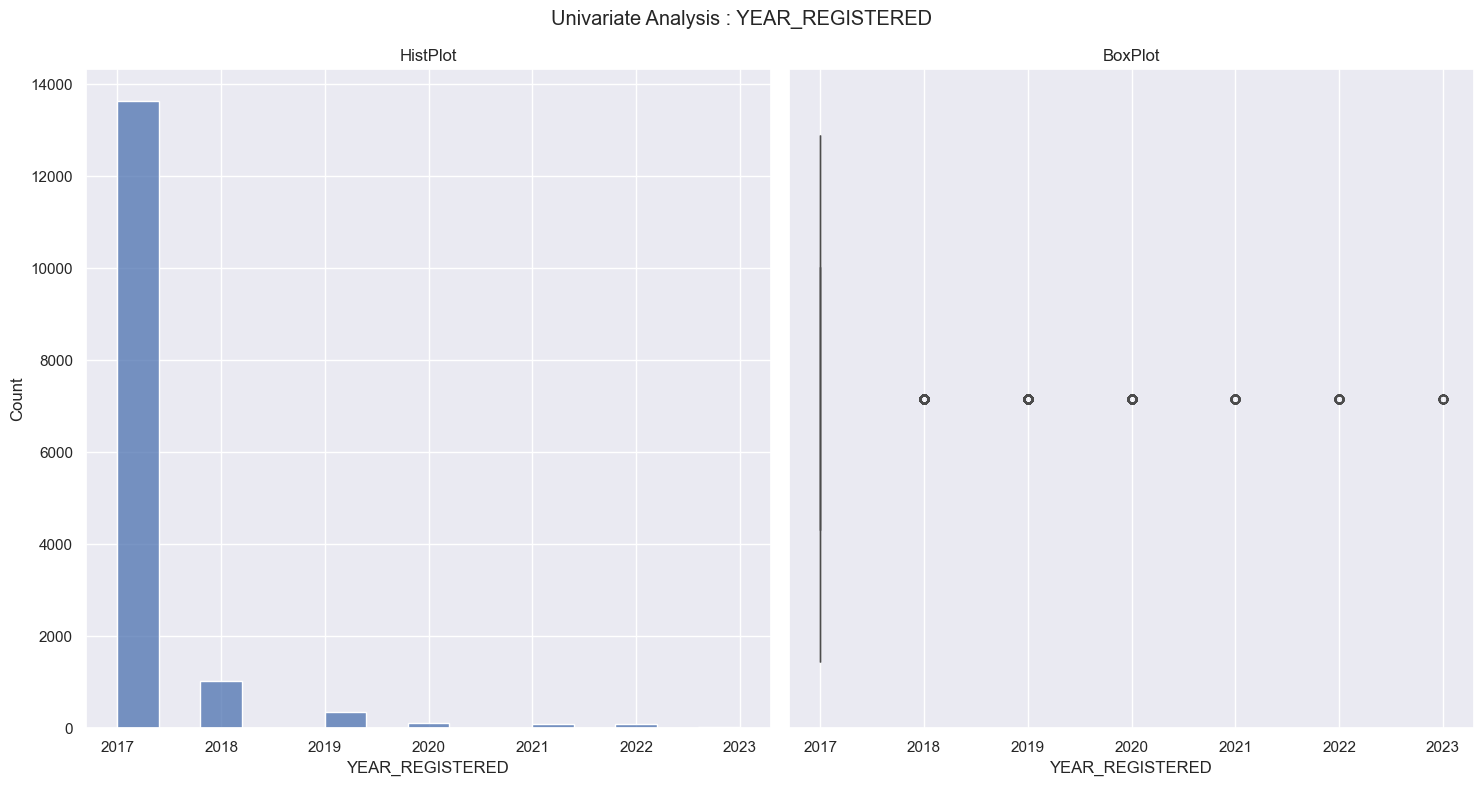

In [536]:
univariate_plot(df_new, "YEAR_REGISTERED")

**YEAR BUILT**

In [537]:
df_new["YEAR_BUILT"].describe().reset_index().T

0           1          2       3       4       5       6  \
index         count        mean        std     min     25%     50%     75%   
YEAR_BUILT  15322.0  1961.21988  19.057028  1805.0  1955.0  1961.0  1970.0   

                 7  
index          max  
YEAR_BUILT  2022.0

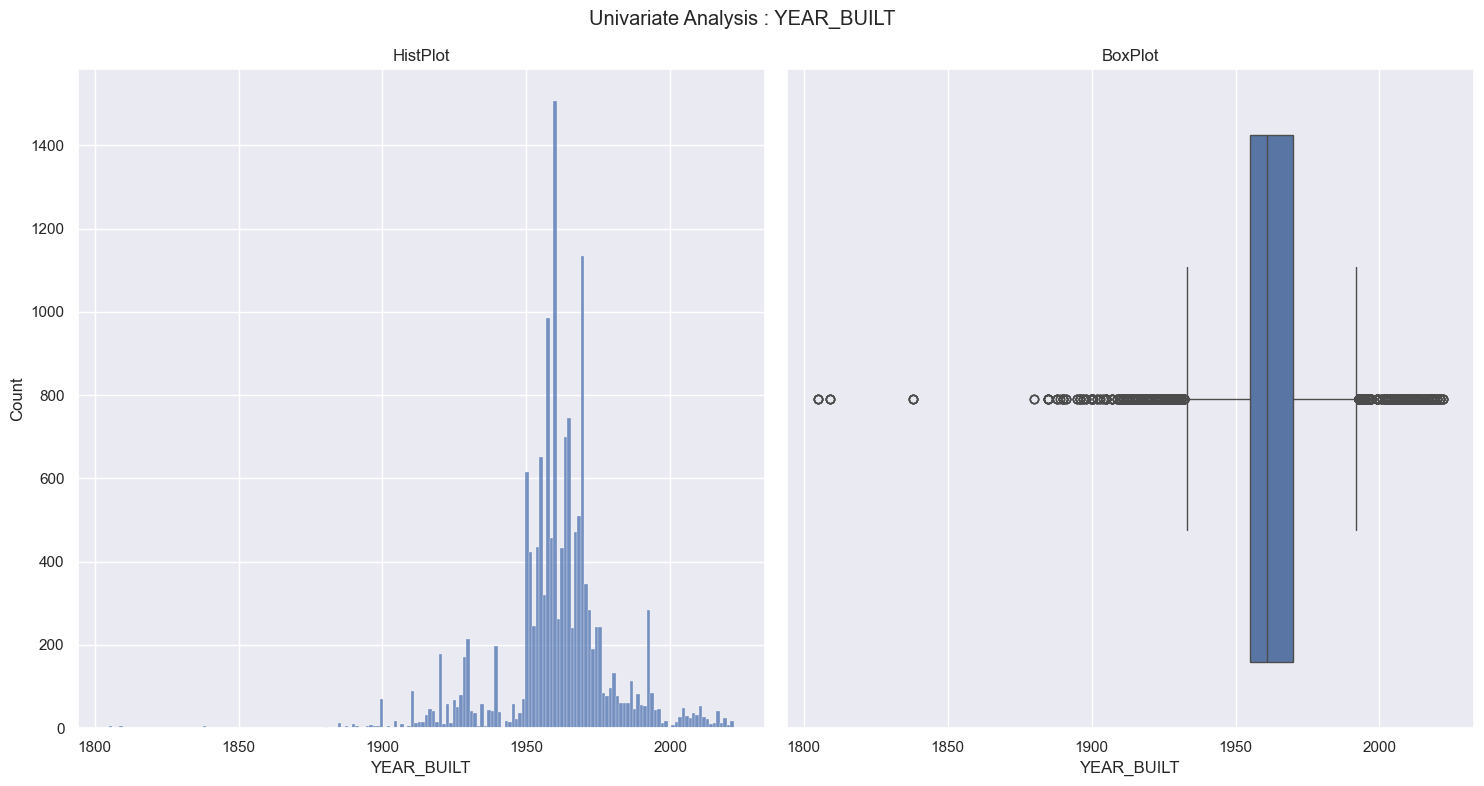

In [538]:
univariate_plot(df_new, "YEAR_BUILT")

**YEAR EVALUATED**

In [539]:
df_new["YEAR_EVALUATED"].describe().reset_index().T

0            1         2       3       4       5  \
index             count         mean       std     min     25%     50%   
YEAR_EVALUATED  15322.0  2019.964234  2.266904  2017.0  2018.0  2020.0   

                     6       7  
index              75%     max  
YEAR_EVALUATED  2022.0  2024.0

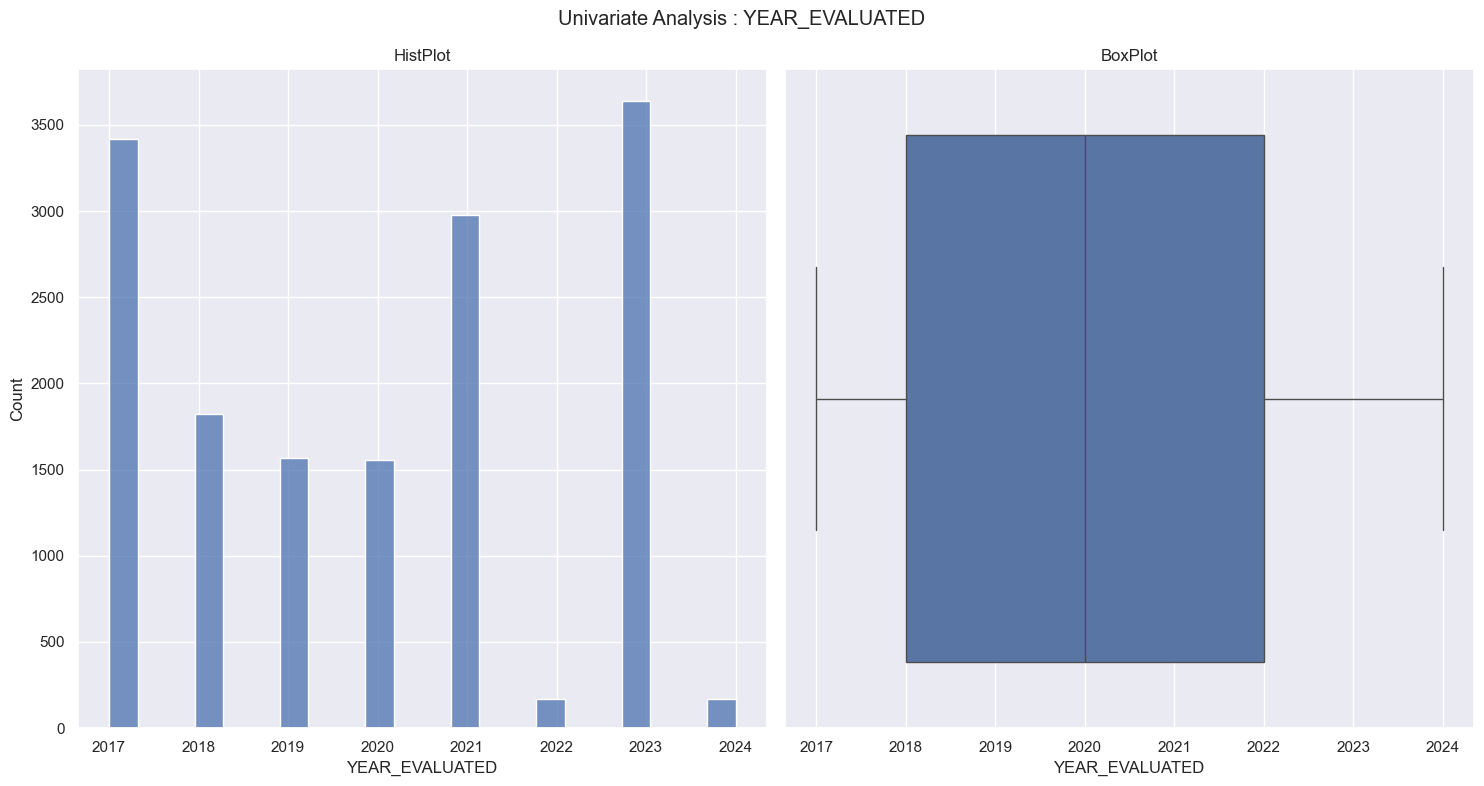

In [540]:
univariate_plot(df_new, "YEAR_EVALUATED")

**CONFIRMED STOREYS**

In [541]:
df_new["CONFIRMED_STOREYS"].describe().reset_index().T

0         1        2    3    4    5     6     7
index                count      mean      std  min  25%  50%   75%   max
CONFIRMED_STOREYS  15322.0  7.664535  6.30535  3.0  3.0  4.0  10.0  51.0

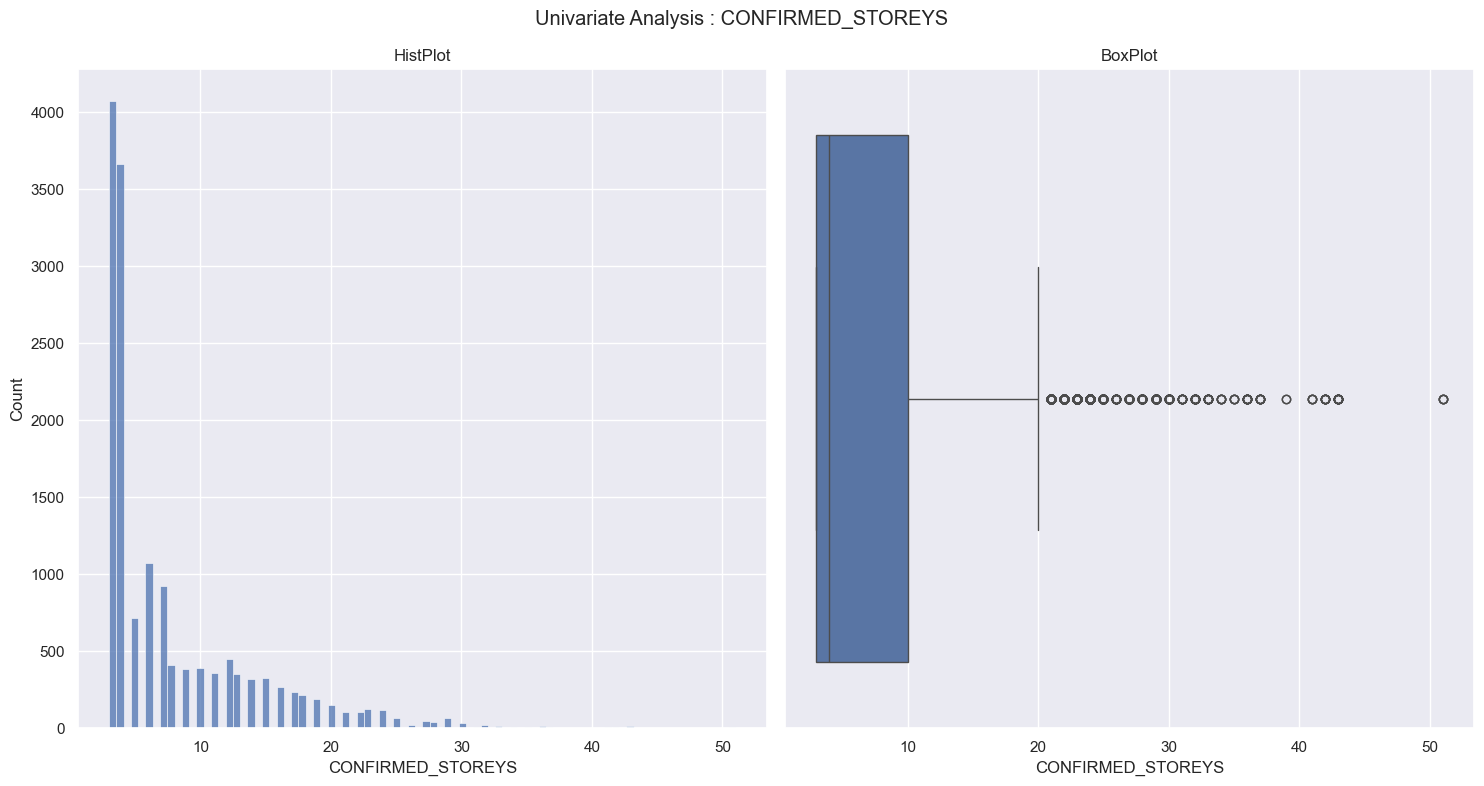

In [542]:
univariate_plot(df_new, "CONFIRMED_STOREYS")

**CONFIRMED UNITS**

In [543]:
df_new["CONFIRMED_UNITS"].describe().reset_index().T

0          1          2     3     4     5      6      7
index              count       mean        std   min   25%   50%    75%    max
CONFIRMED_UNITS  15322.0  88.396162  95.835855  10.0  24.0  48.0  121.0  793.0

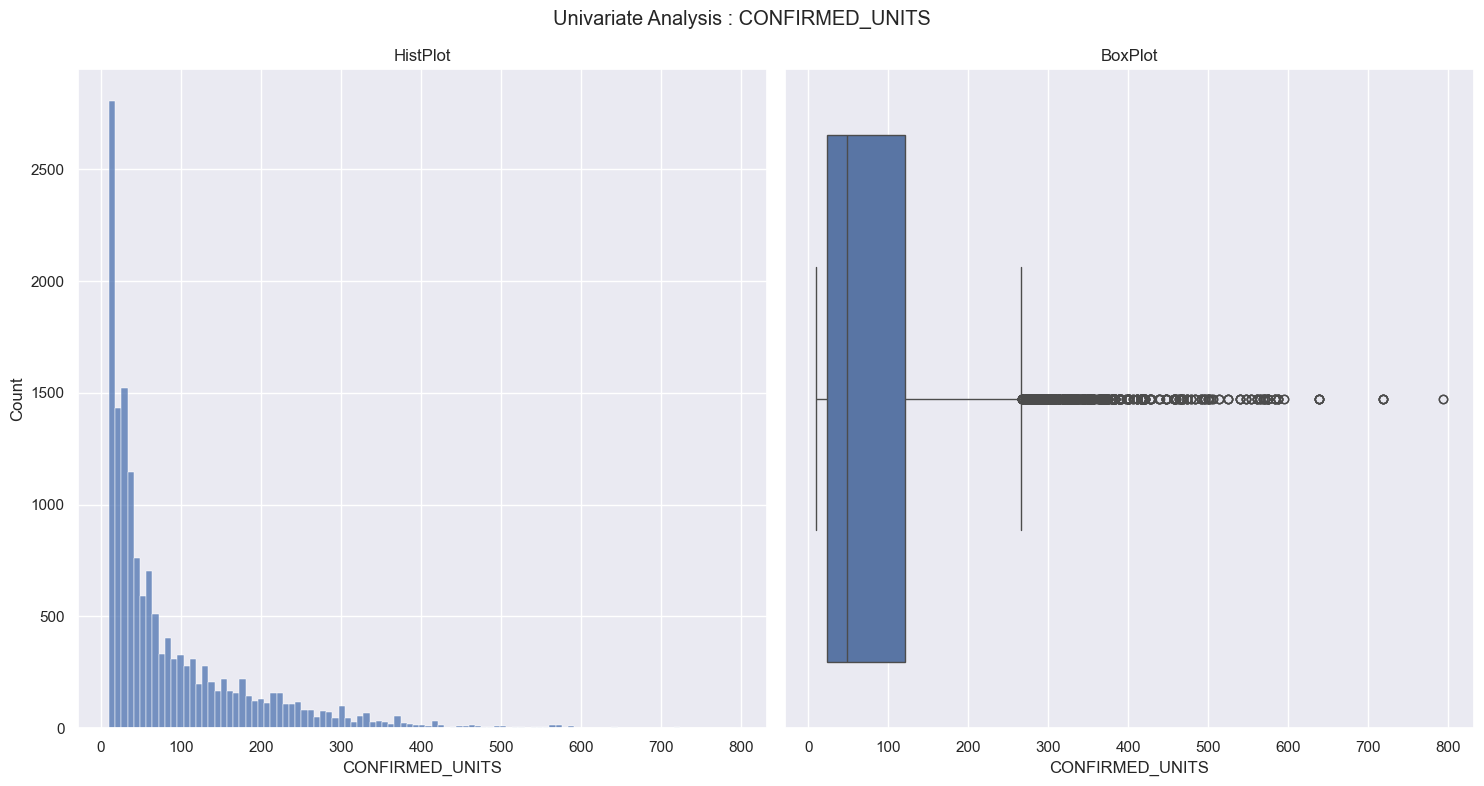

In [544]:
univariate_plot(df_new, "CONFIRMED_UNITS")

**SCORE**

In [545]:
df_new["SCORE"].describe().reset_index().T

0          1          2    3     4     5     6      7
index    count       mean        std  min   25%   50%   75%    max
SCORE  15322.0  76.922203  11.627172  0.0  68.0  78.0  86.0  100.0

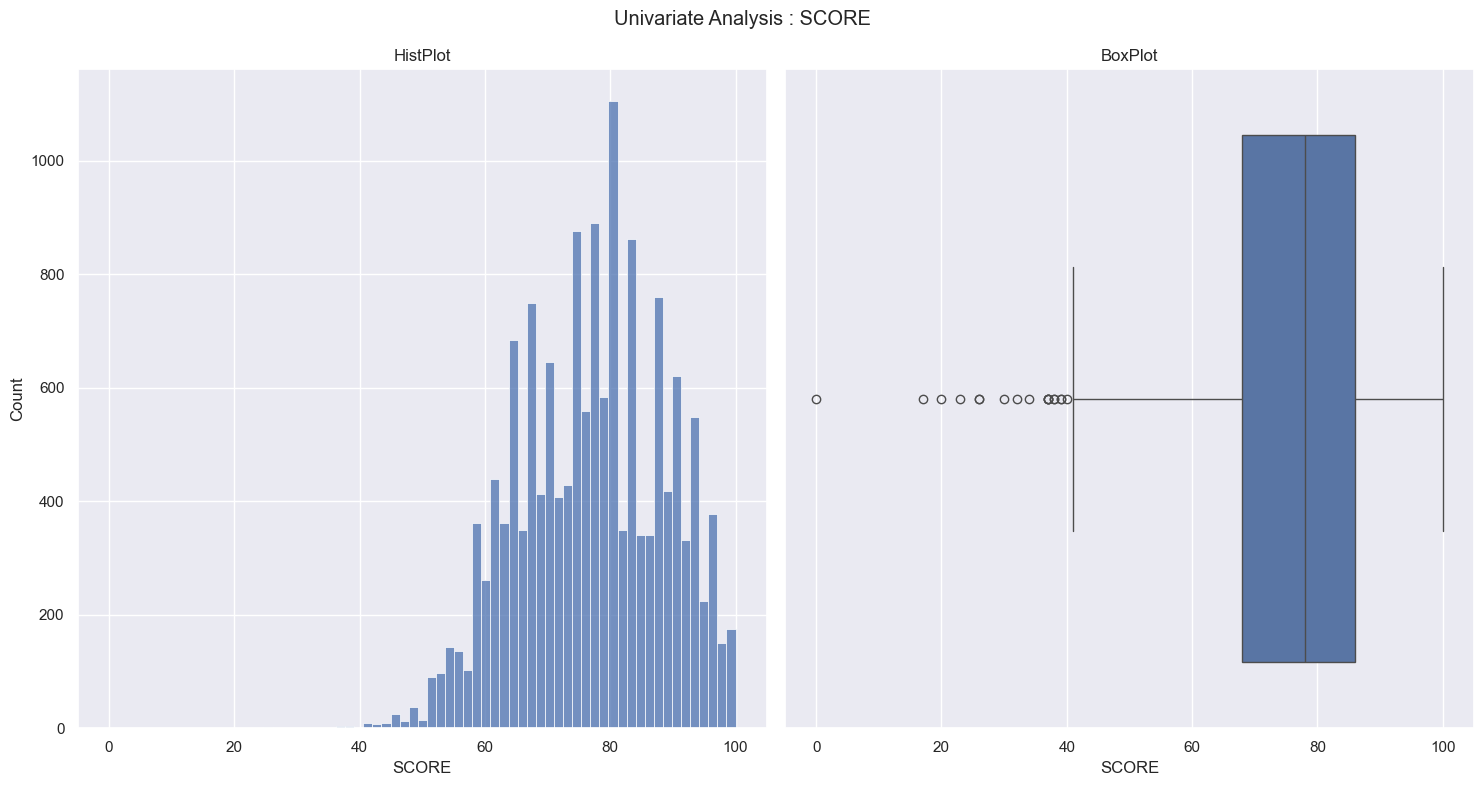

In [546]:
univariate_plot(df_new, "SCORE")

### Bivariate Analysis

**YEAR BUILT vs SCORE**

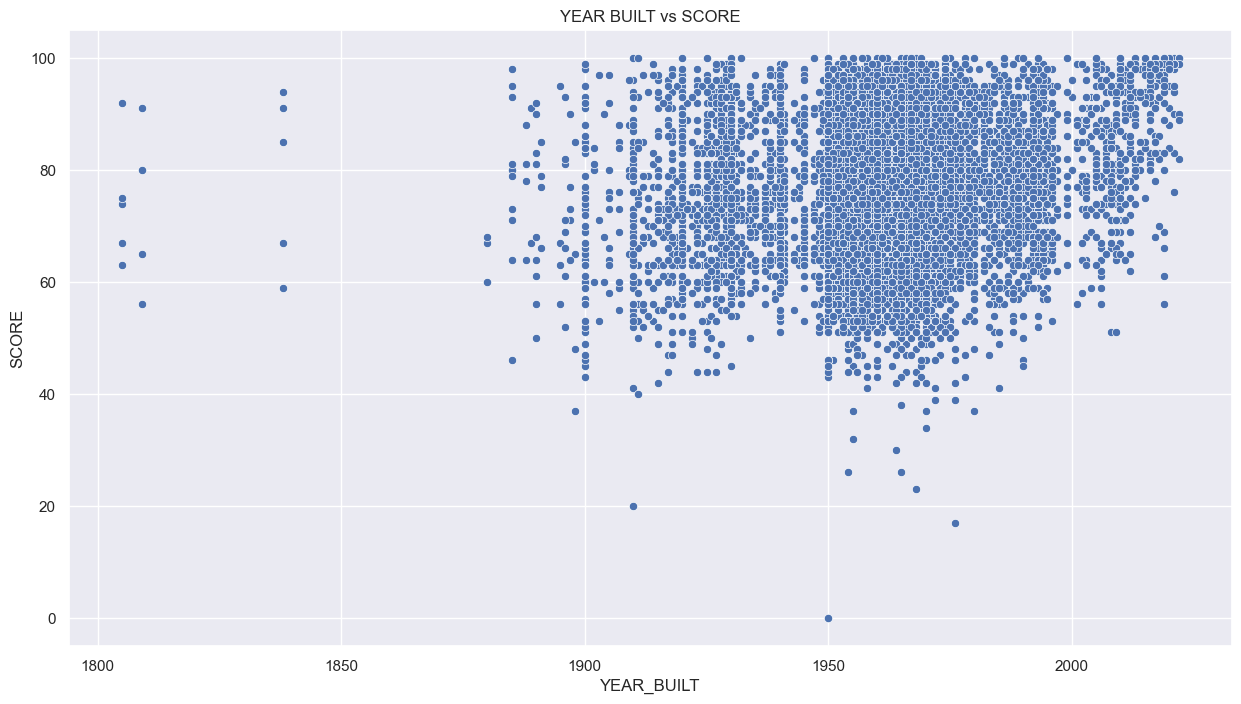

In [547]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_new, x = "YEAR_BUILT", y = "SCORE")
plt.title("YEAR BUILT vs SCORE")
plt.show()

**CONFIRMED UNITS vs SCORE**

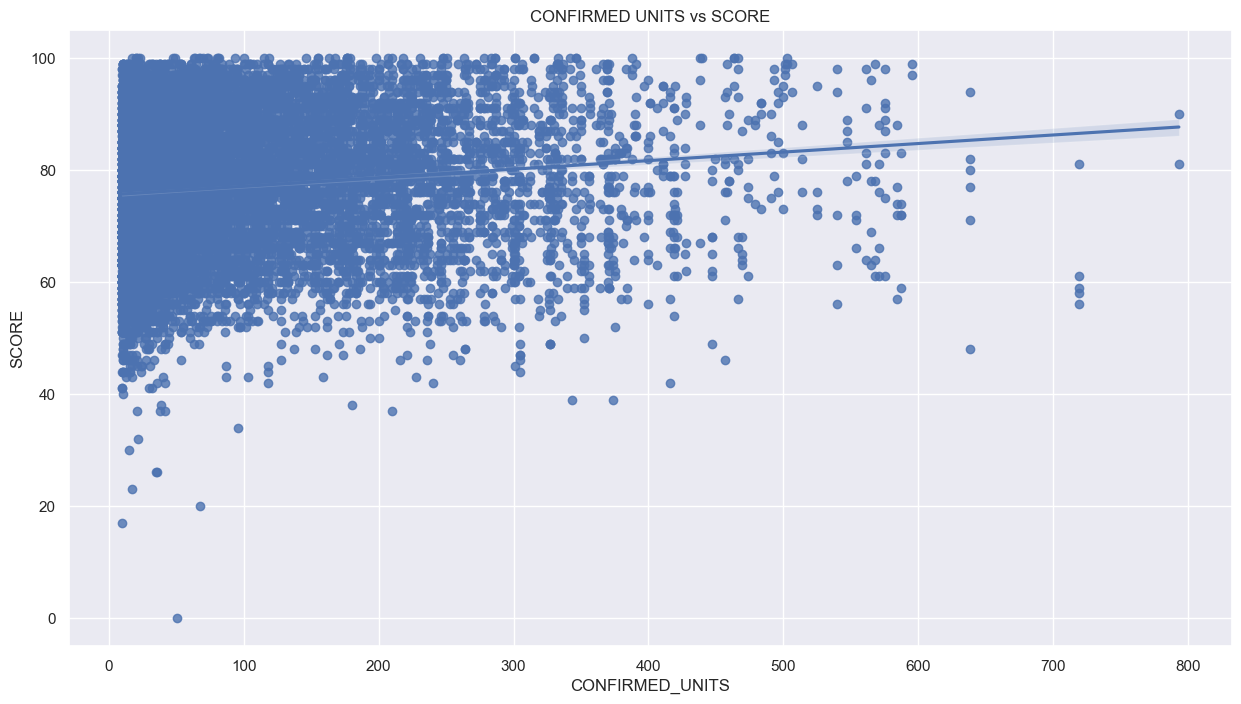

In [548]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_new, x = "CONFIRMED_UNITS", y = "SCORE")
plt.title("CONFIRMED UNITS vs SCORE")
plt.show()

**CONFIRMED STOREYS vs SCORE**

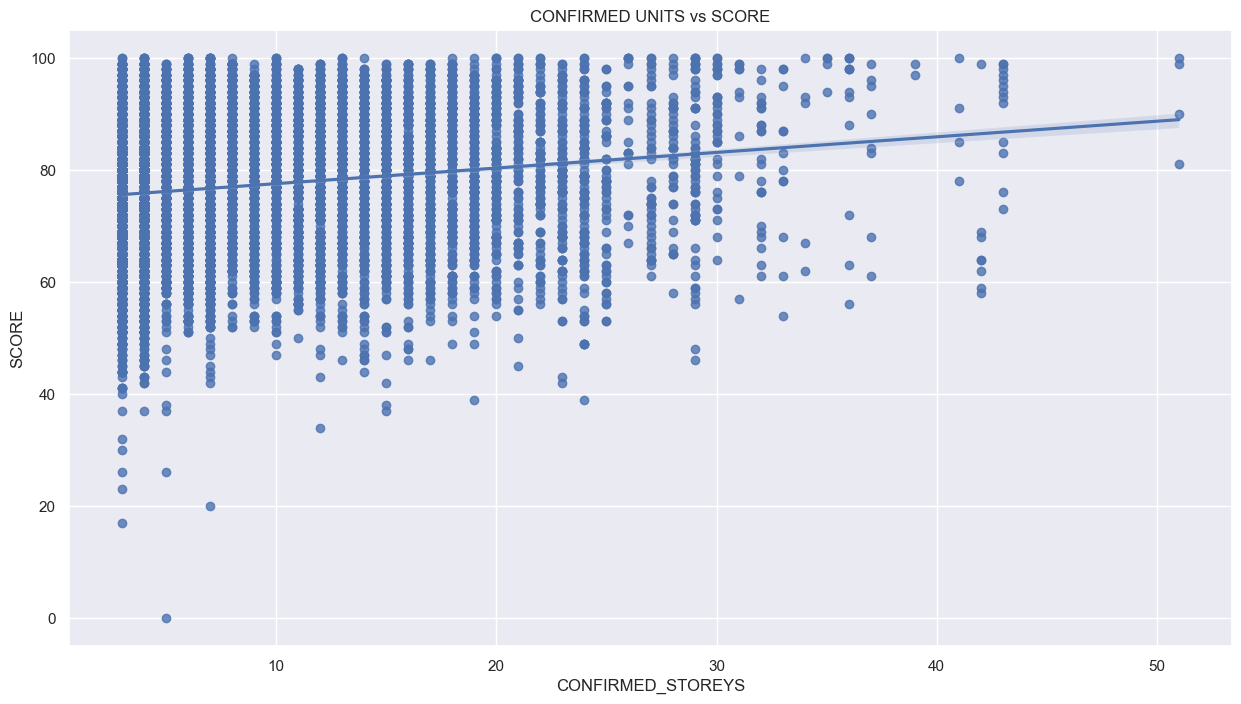

In [549]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_new, x = "CONFIRMED_STOREYS", y = "SCORE")
plt.title("CONFIRMED UNITS vs SCORE")
plt.show()

**WARD vs SCORE**

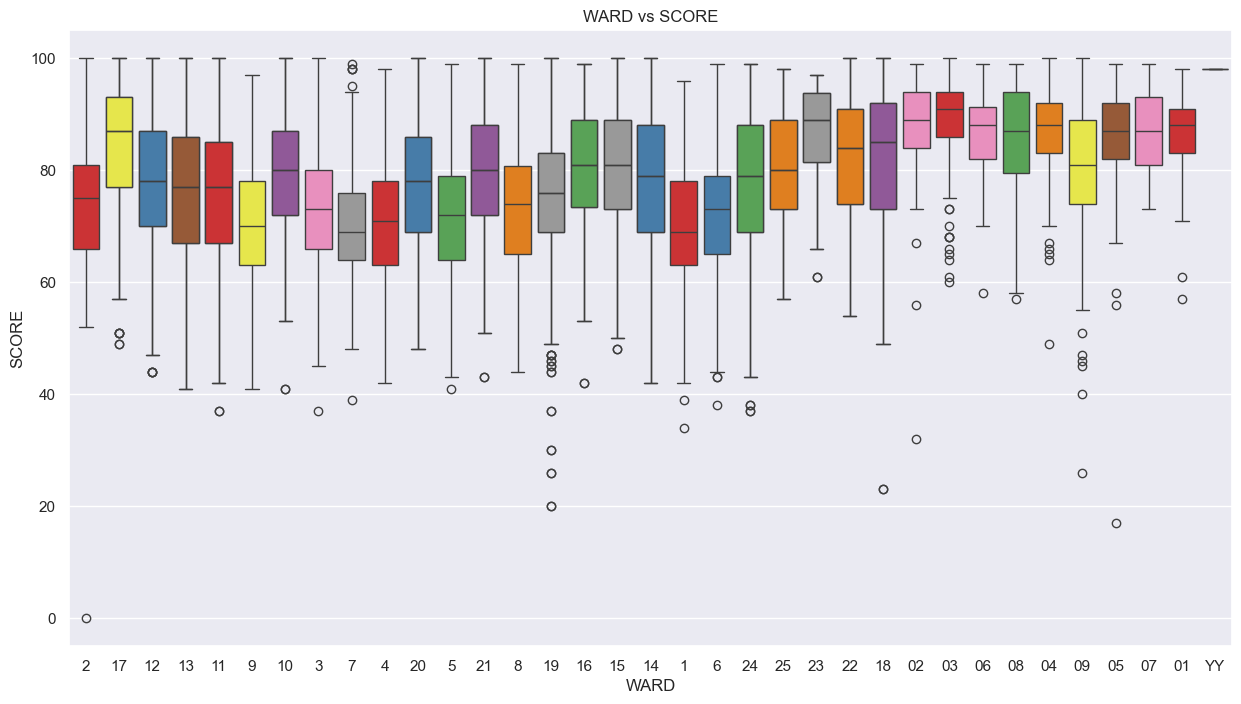

In [550]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_new, x = "WARD", y = "SCORE", palette = "Set1")
plt.title("WARD vs SCORE")
plt.show()

**WARDNAME vs SCORE**

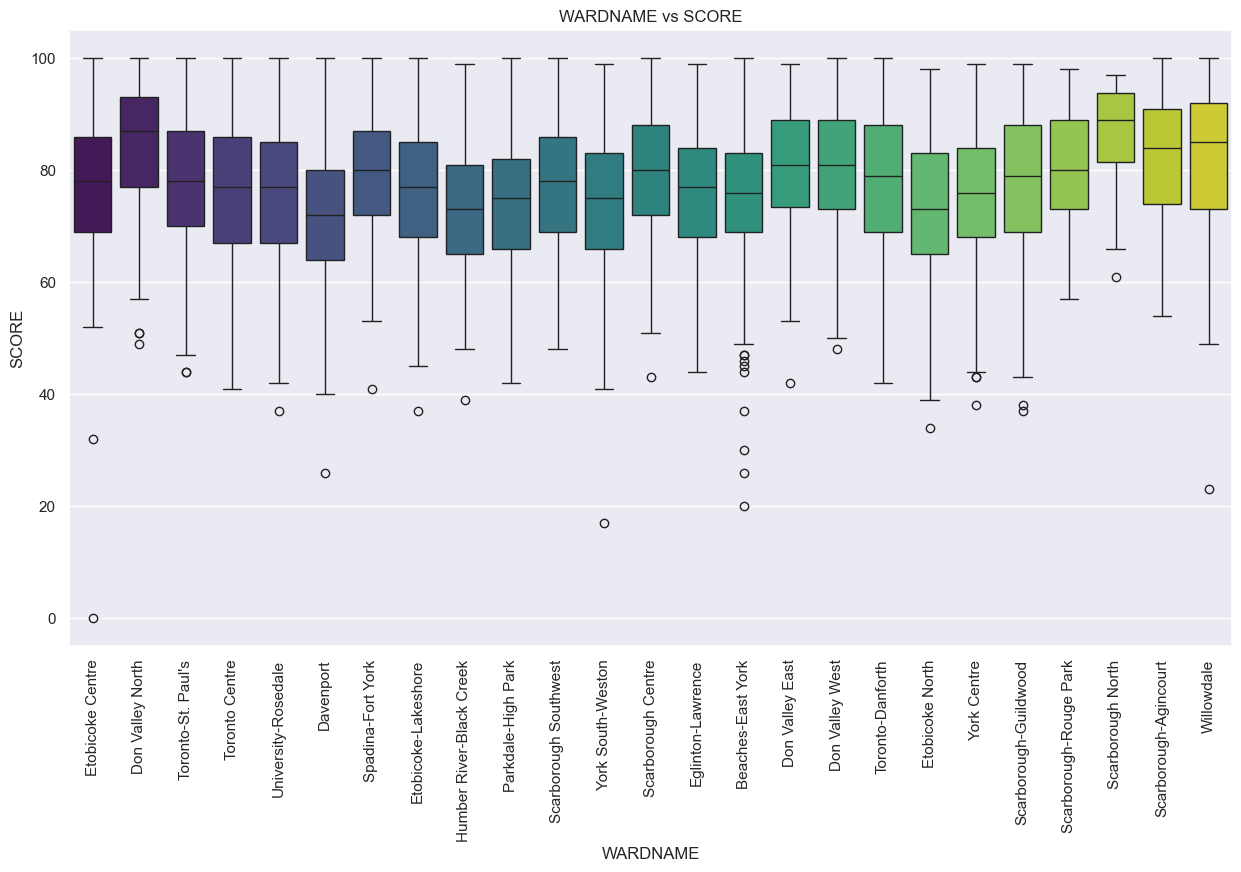

In [551]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_new, x = "WARDNAME", y = "SCORE", palette = "viridis")
plt.title("WARDNAME vs SCORE")
plt.xticks(rotation = 90)
plt.show()

**PROPERTY TYPE vs SCORE**

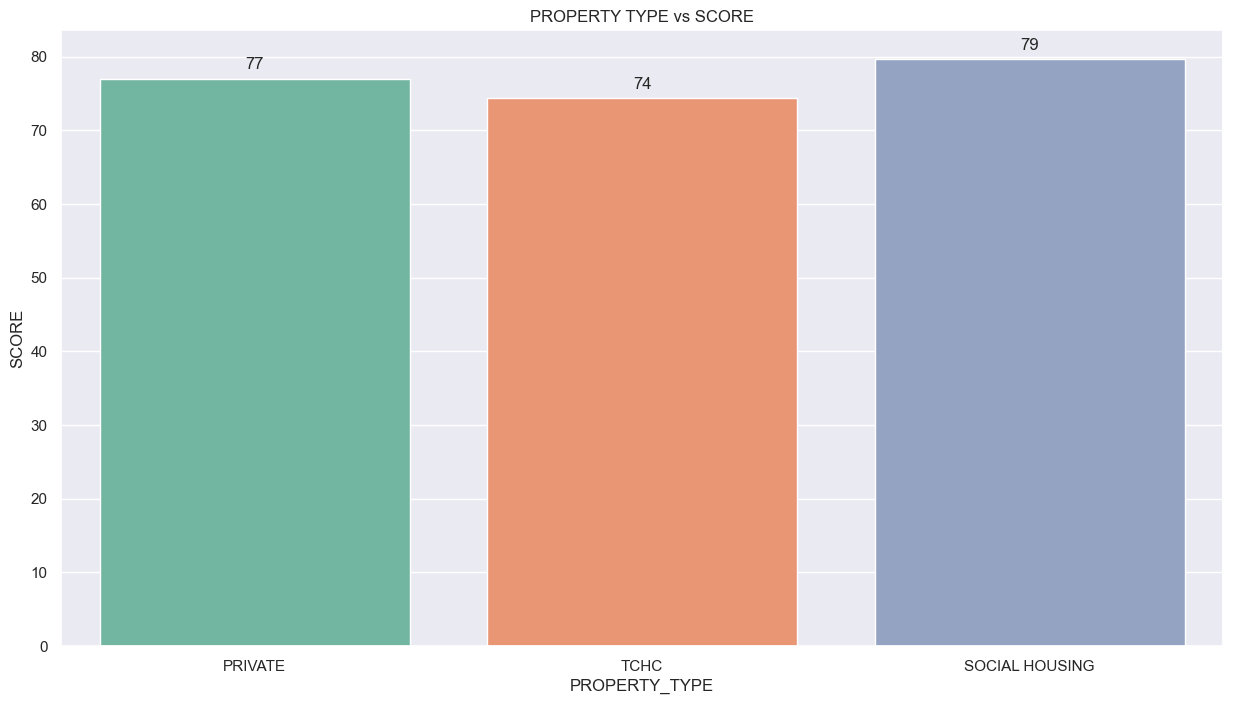

In [552]:
plt.figure(figsize = [15,8])
ax = sns.barplot(data = df_new, x = "PROPERTY_TYPE", y = "SCORE", palette = "Set2", estimator = "mean", errorbar = ("ci", 0))

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "bottom", xytext = (0, 5), textcoords = 'offset points')
    
plt.title("PROPERTY TYPE vs SCORE")
plt.show()

**YEAR EVALUATED vs SCORE**

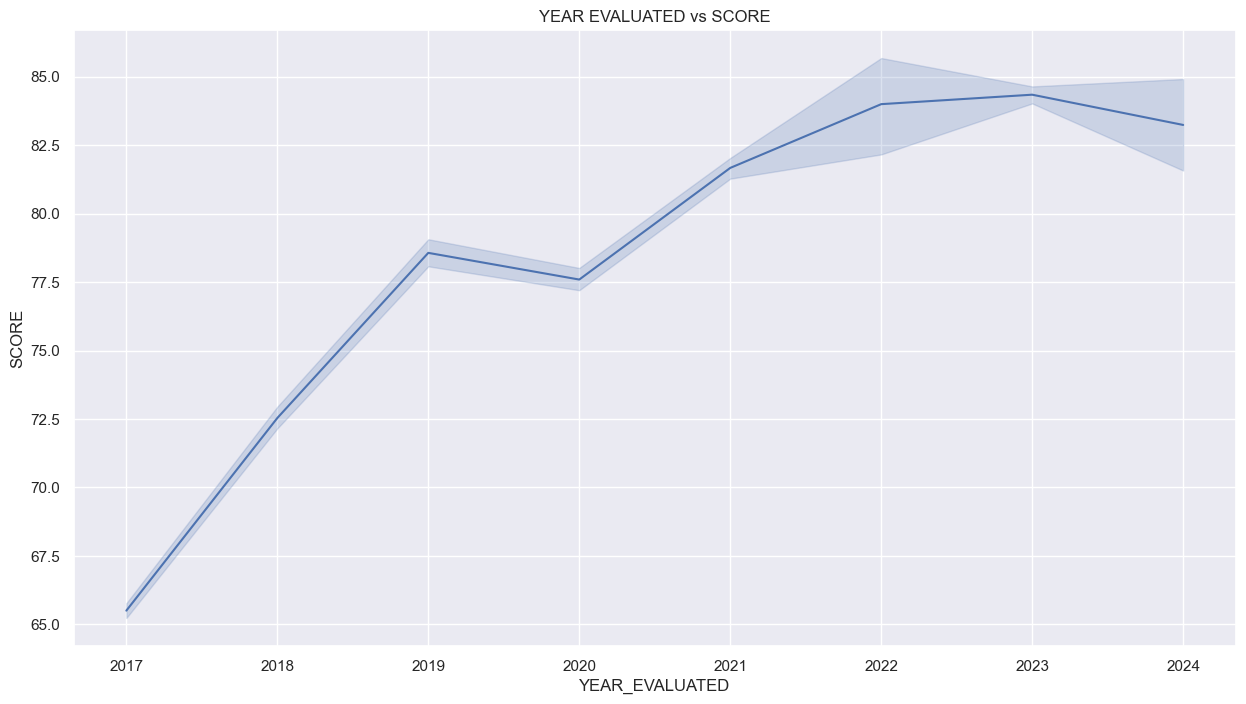

In [553]:
plt.figure(figsize = [15,8])
ax = sns.lineplot(data = df_new, x = "YEAR_EVALUATED", y = "SCORE")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "bottom", xytext = (0, 5), textcoords = 'offset points')
    
plt.title("YEAR EVALUATED vs SCORE")
plt.show()

### Multivariate Analysis

**YEAR BUILT, CONFIRMED UNITS, and SCORE**

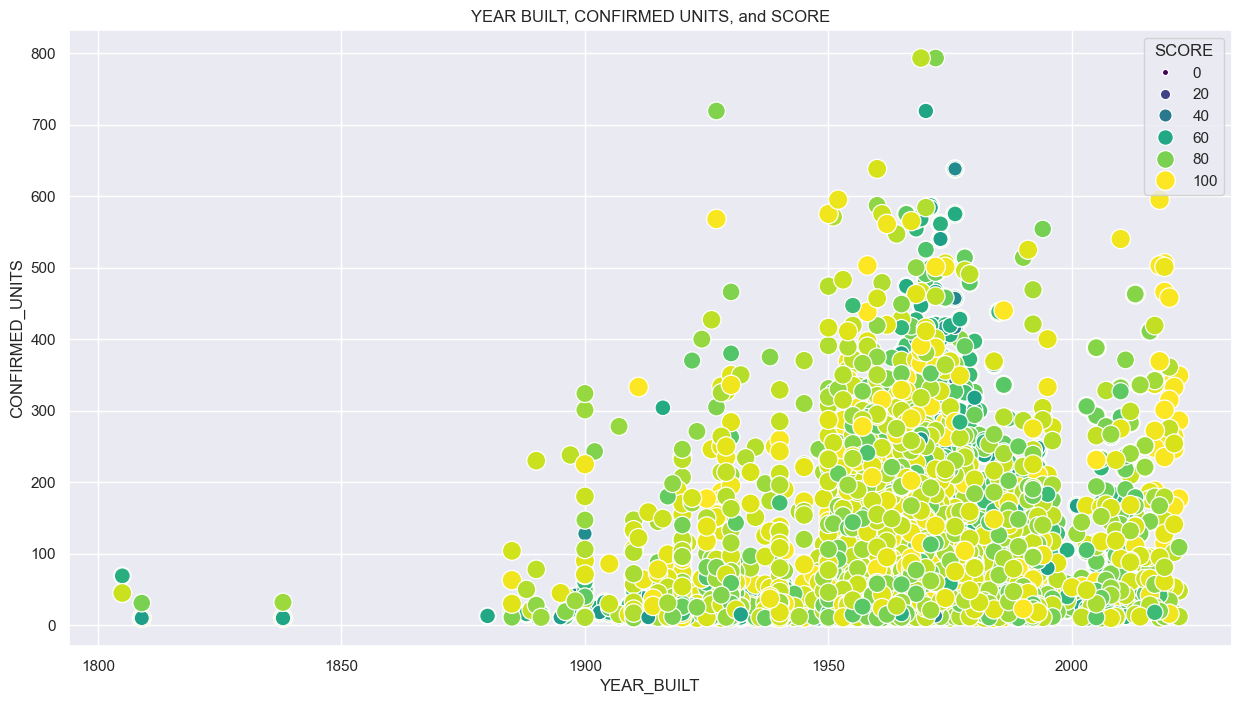

In [554]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_new, x = 'YEAR_BUILT', y = 'CONFIRMED_UNITS', 
                hue='SCORE', palette = 'viridis', 
                size = 'SCORE', sizes = (20, 200))
plt.title("YEAR BUILT, CONFIRMED UNITS, and SCORE")
plt.show()

**PROPERTY TYPE, WARD, and SCORE**

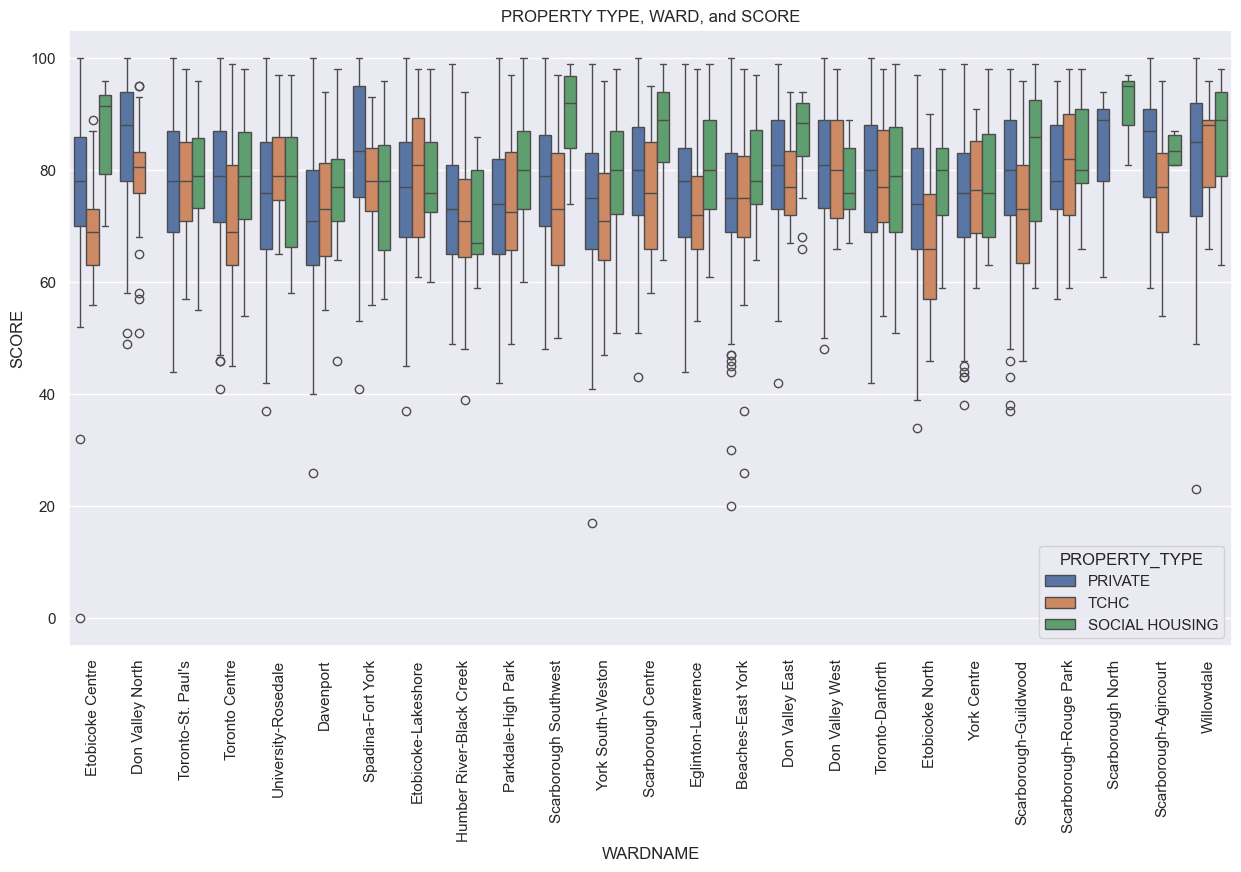

In [555]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'WARDNAME', y = 'SCORE', hue = 'PROPERTY_TYPE')
plt.title('PROPERTY TYPE, WARD, and SCORE')
plt.xticks(rotation = 90)
plt.show()

**LATITUDE, LONGITUDE, and SCORE**

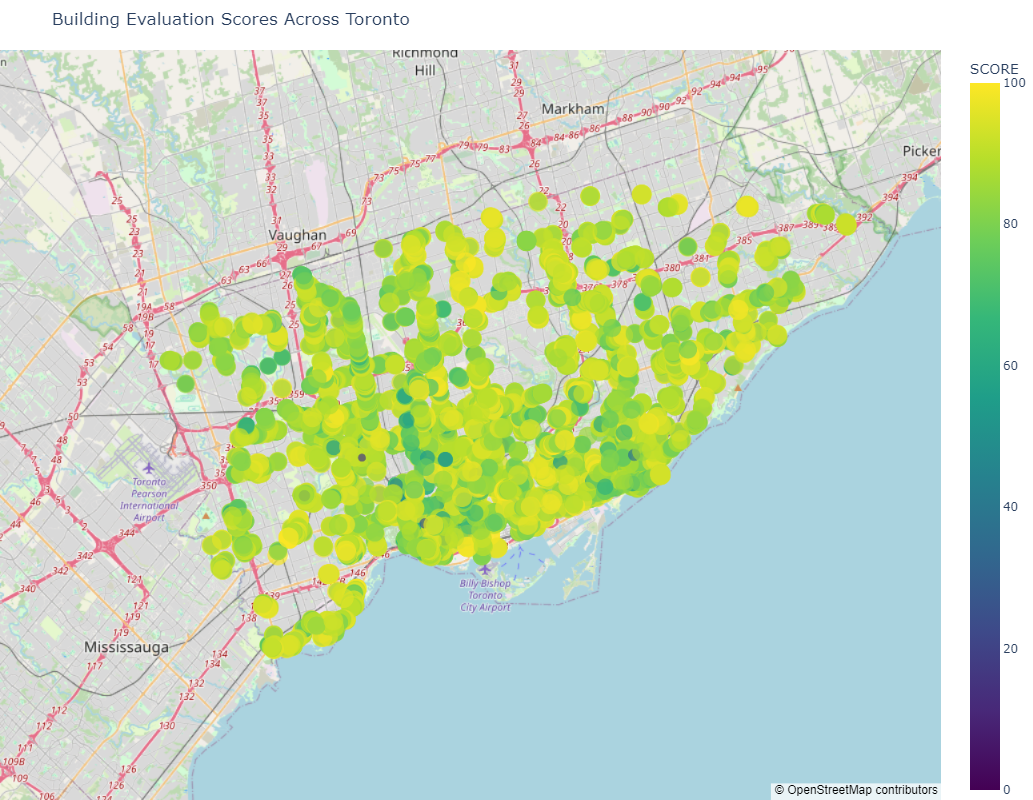

In [556]:
fig = px.scatter_mapbox(df_new, 
                        lat = "LATITUDE", 
                        lon = "LONGITUDE", 
                        color = "SCORE",
                        size = "SCORE",
                        hover_name = "SITE_ADDRESS",
                        hover_data = ["YEAR_BUILT", "CONFIRMED_UNITS"],
                        color_continuous_scale = px.colors.sequential.Viridis,
                        size_max = 15,
                        zoom = 10,
                        title = "Building Evaluation Scores Across Toronto")

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":50,"l":0,"b":0}, width = 1500, height = 800)

fig.show()

In [557]:
df_new.to_csv("cleaned_data.csv", index = False)

In [558]:
df_new["RESULTS_OF_SCORE"] .unique()

array(['Evaluation needs to be conducted in 3 years',
       'Evaluation needs to be conducted in 2 years',
       'Evaluation needs to be conducted in 1 year', 'Building Audit'],
      dtype=object)

In [559]:
df_new[df_new["RESULTS_OF_SCORE"] == "Building Audit"]["SCORE"].describe()

count    135.000000
mean      44.562963
std        7.064318
min        0.000000
25%       43.500000
50%       46.000000
75%       49.000000
max       50.000000
Name: SCORE, dtype: float64

In [560]:
df_old[df_old["RESULTS_OF_SCORE"] == "Building Audit"]["SCORE"].describe()

count    117.000000
mean      45.538462
std        5.961859
min        0.000000
25%       44.000000
50%       47.000000
75%       49.000000
max       50.000000
Name: SCORE, dtype: float64

In [561]:
df_curr[df_curr["RESULTS_OF_SCORE"] == "Building Audit"]["SCORE"].describe()

count    18.000000
mean     38.222222
std      10.085257
min      17.000000
25%      30.500000
50%      41.500000
75%      46.000000
max      49.000000
Name: SCORE, dtype: float64

In [165]:
len(df_new[df_new["RESULTS_OF_SCORE"] == "Building Audit"]["SCORE"][df_new[df_new["RESULTS_OF_SCORE"] == "Building Audit"]["SCORE"] > 50])

18